# De belles cartes avec python: mise en pratique

``` python
import sys
sys.path.insert(1, '../../../../') #insert the utils module
from utils import print_badges

#print_badges(__file__)
print_badges("content/course/visualisation/maps.qmd")
```

<p class="badges">

<a href="https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/visualisation/maps.ipynb" class="github"><i class="fab fa-github"></i></a>
<a href="https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/visualisation/maps.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter" alt="Download"></a>
<a href="https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master/notebooks/course/visualisation/maps.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter" alt="nbviewer"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/jupyter-python?autoLaunch=true&onyxia.friendlyName=%C2%ABpython-datascience%C2%BB&init.personalInit=%C2%ABhttps%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmaster%2Fsspcloud%2Finit-jupyter.sh%C2%BB&init.personalInitArgs=%C2%ABvisualisation%20maps%C2%BB&security.allowlist.enabled=false" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&amp;color=yellow?logo=Python" alt="Onyxia"></a><br>
<a href="https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath={binder_path}" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=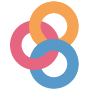" alt="Binder"></a>
<a href="http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master/notebooks/course/visualisation/maps.ipynb" target="_blank" rel="noopener"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
<a href="https://github.dev/linogaliana/python-datascientist/notebooks/course/visualisation/maps.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/static/v1?logo=visualstudiocode&label=&message=Open%20in%20Visual%20Studio%20Code&labelColor=2c2c32&color=007acc&logoColor=007acc" alt="githubdev"></a>

</p>

</p>

La pratique de la cartographie se fera, dans ce cours, en répliquant des cartes qu’on peut trouver sur
la page de l’*open-data* de la ville de Paris
[ici](https://opendata.paris.fr/explore/dataset/comptage-velo-donnees-compteurs/information/?disjunctive.id_compteur&disjunctive.nom_compteur&disjunctive.id&disjunctive.name).

<div class="alert alert-info" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #007bff80;">
<h3 class="alert-heading"><i class="fa fa-comment"></i> Note</h3>

Produire de belles cartes demande du temps mais aussi du bon sens. En fonction de la structure des données, certaines représentations sont à éviter voire à exclure. L’excellent guide [disponible ici](https://juliedjidji.github.io/memocarto/semio.html) propose quelques règles et évoque les erreurs à éviter lorsqu’on désire effectuer des
représentations spatiales.
Celui-ci reprend un [guide de sémiologie cartographique](https://www.insee.fr/fr/statistiques/3640429)
produit par l’Insee qui propose de nombreux conseils pratiques pour produire des représentations
cartographiques sensées.

</div>

Ce TP vise à initier:

-   Au module graphique de [geopandas](https://geopandas.org/mapping.html) ainsi qu’aux packages [geoplot](https://residentmario.github.io/geoplot/index.html) et
    [contextily](https://contextily.readthedocs.io/en/latest/intro_guide.html) pour la construction de cartes figées. `geoplot` est construit sur `seaborn` et constitue ainsi une extension des graphiques de base.
-   Au package [folium](https://python-visualization.github.io/folium/) qui est un point d’accès vers la librairie JavaScript [leaflet](https://leafletjs.com/) permettant de produire des cartes interactives

Les données utilisées sont :

-   Un sous-ensemble des données de [paris open data](https://opendata.paris.fr/explore/dataset/comptage-velo-donnees-compteurs/information/?disjunctive.id_compteur&disjunctive.nom_compteur&disjunctive.id&disjunctive.name) a été mis à disposition
    sur {{< githubrepo >}} pour faciliter l’import (élimination des colonnes
    qui ne nous servirons pas mais ralentissent l’import)
-   [La localisation précise des stations](https://parisdata.opendatasoft.com/explore/dataset/comptage-velo-compteurs/download/?format=geojson&timezone=Europe/Berlin&lang=fr)
-   [Arrondissements parisiens](https://opendata.paris.fr/explore/dataset/arrondissements/download/?format=geojson&timezone=Europe/Berlin&lang=fr)

<div class="alert alert-danger" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left: .2rem solid #ff0039;">
<h3 class="alert-heading"><i class="fa fa-exclamation-triangle"></i> Attention</h3>

Certaines librairies géographiques dépendent de `rtree` qui est parfois difficile à installer car
ce *package* dépend de librairies compilées qui sont compliquées à installer sur `Windows`.
Pour installer `rtree` sur `Windows`, le mieux est d’utiliser `Anaconda`.

</div>

Avant de pouvoir commencer, il est nécessaire d’installer quelques
packages au préalable:

In [2]:
# Installation rtree via Anaconda sur windows
# !conda install rtree --yes

# Sur colab
!pip install pandas fiona shapely pyproj rtree # à faire obligatoirement en premier pour utiliser rtree ou pygeos pour les jointures spatiales
!pip install contextily
!pip install geopandas
!pip install geoplot

Dans la première partie, nous allons utiliser les packages suivants:

In [3]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import geoplot
import matplotlib.pyplot as plt
import folium

/miniconda/envs/python-ENSAE/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning:

The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.


## Première carte avec l’API `matplotlib` de `geopandas`

<div class="alert alert-success" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #3fb618;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Exercice 1: Importer les données</h3>

Importer les données de compteurs de vélos en deux temps.

1.  D’abord, les comptages peuvent être trouvés à l’adresse <https://github.com/linogaliana/python-datascientist/raw/master/data/bike.csv>. :warning: Il s’agit de données
    compressées au format `gzip`, il faut donc utiliser l’option `compression`. Nommer cet objet `comptages`.
2.  Importer les données de localisation des compteurs à partir de l’url <https://parisdata.opendatasoft.com/explore/dataset/comptage-velo-compteurs/download/?format=geojson&timezone=Europe/Berlin&lang=fr>. Nommer cet objet `compteurs`.
3.  Faire attention à deux valeurs aberrantes. Utiliser
    la fonctionalité `str.contains` pour exclure les
    observations contenant *“Bike IN”* ou *“Bike OUT”*
    dans la variable
    `nom_compteur`
4.  On va également utiliser les données d’arrondissements de la ville de Paris. Importer ces données depuis <https://opendata.paris.fr/explore/dataset/arrondissements/download/?format=geojson&timezone=Europe/Berlin&lang=fr>. Nommer cet objet `arrondissements`.
5.  Utiliser la méthode `plot` pour représenter les localisations des compteurs dans l’espace. C’est, on peut l’avouer, peu informatif sans apport extérieur. Il va donc falloir travailler un peu l’esthétique

</div>

In [4]:
# 1. Chargement de "comptages"
comptages = pd.read_csv('https://github.com/linogaliana/python-datascientist/raw/master/data/bike.csv', compression = 'gzip')
#comptages.head()

In [5]:
#2. Chargement de "compteurs"
compteurs = gpd.read_file("https://parisdata.opendatasoft.com/explore/dataset/comptage-velo-compteurs/download/?format=geojson&timezone=Europe/Berlin&lang=fr")
#compteurs.head()

In [6]:
compteurs = compteurs.loc[~compteurs["nom_compteur"].str.contains(r"(Bike IN|Bike OUT)")]

/tmp/ipykernel_357/3602001210.py:1: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.


In [7]:
#3. Chargement de "arrondissements"
arrondissements = gpd.read_file("https://opendata.paris.fr/explore/dataset/arrondissements/download/?format=geojson&timezone=Europe/Berlin&lang=fr")
# arrondissements.head()

<Axes: >

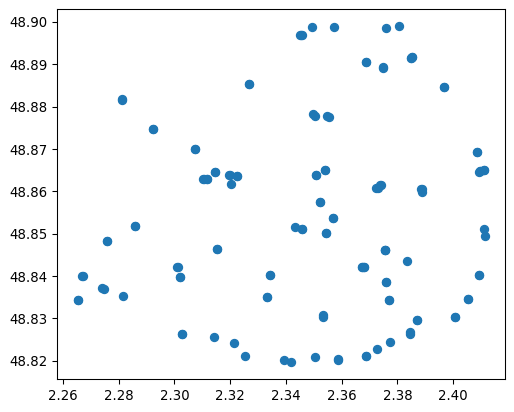

In [8]:
# 4. Localisation des compteurs
compteurs.plot()

<div class="alert alert-danger" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left: .2rem solid #ff0039;">
<h3 class="alert-heading"><i class="fa fa-exclamation-triangle"></i> Warning</h3>

On serait tenté de faire un *merge* de la base compteurs et comptages.
En l’occurrence, il s’agirait d’un produit cartésien puisqu’il s’agit de faire exploser la base spatiale.
Avec des données spatiales, c’est souvent une très mauvaise idée. Cela duplique les points, créant des difficultés à représenter les données mais aussi ralentit les calculs.
Sauf à utiliser la méthode `dissolve` (qui va agréger *k* fois la même géométrie…), les géométries sont perdues lorsqu’on effectue des `groupby`.

</div>

Maintenant, tout est prêt pour une première carte. `matplotlib` fonctionne selon
le principe des couches. On va de la couche la plus lointaine à celle le plus
en surface. L’exception est lorsqu’on ajoute un fond de carte `contextily` via
`ctx.add_basemap`: on met cet appel en dernier.

<div class="alert alert-success" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #3fb618;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Exercice 2: Première carte</h3>

Représenter une carte des `compteurs` avec le fonds de carte des `arrondissements`

-   Faire attention à avoir des arrondissements dont l’intérieur est transparent (argument à utiliser: `facecolor`).
-   Faire des bordures d’arrondissements noires et affichez les compteurs en rouge.
-   Pour obtenir un graphique plus grand, vous pouvez utiliser l’argument `figsize = (10,10)`.
-   Pour les localisations, les points doivent être rouges en étant plus transparent au centre (argument à utiliser: `alpha`)

</div>

<Axes: >

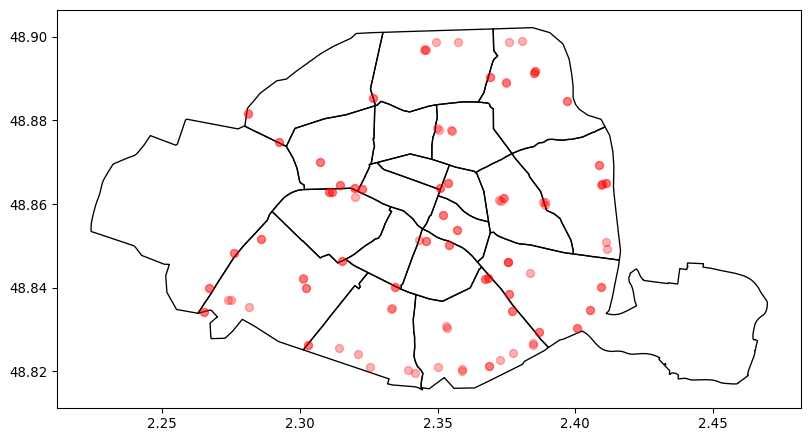

In [9]:
# Carte des compteurs par arrondissement
ax = arrondissements.plot(edgecolor = 'black', facecolor="none", figsize = (10,10))
compteurs.plot(ax = ax, alpha = 0.3, color = 'red')
ax

Vous devriez obtenir cette carte:

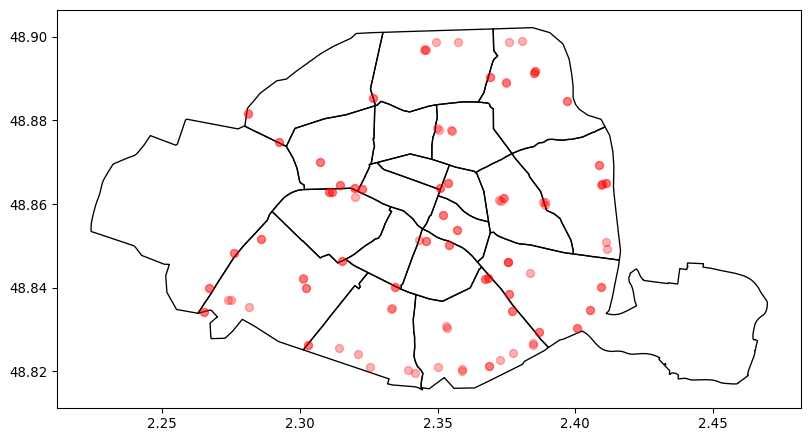

In [10]:
ax.get_figure()

<div class="alert alert-success" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #3fb618;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Exercice 3 : Ajouter un fonds de carte avec contextily</h3>

Repartir de la carte précédente.

1.  Utiliser `ctx.add_basemap` pour ajouter un fonds de carte. Pour ne pas afficher les axes, vous pouvez utiliser `ax.set_axis_off()`.

:warning: *Par défaut, `contextily` désire un système de projection (crs) qui est le Web Mercator (epsg: 3857). Il faut changer la valeur de l’argument `crs`.*

:warning: *Avec les versions anciennes des packages, il faut utiliser `.to_string` sur un objet CRS pour qu’il soit reconnu par `contextily`. Sur des versions récentes, la valeur numérique du code EPSG est suffisante.*

1.  Trouver un fonds de carte plus esthétique, qui permette de visualiser les grands axes, parmi ceux possibles. Pour tester l’esthétique, vous pouvez utiliser [cet url](http://leaflet-extras.github.io/leaflet-providers/preview/index.html). La documentation de référence sur les tuiles disponibles est [ici](https://contextily.readthedocs.io/en/latest/providers_deepdive.html)

</div>

<Axes: >

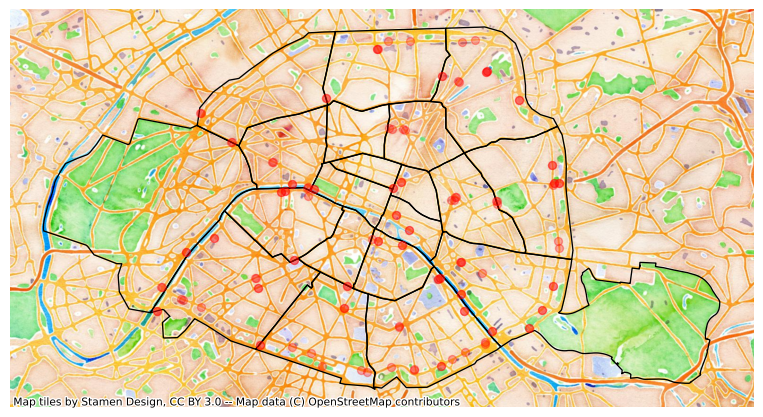

In [11]:
# 1. Ajout d'un fond de carte sur la précédente carte
ax = arrondissements.to_crs("EPSG:3857").plot(edgecolor = 'black', facecolor="none", figsize = (10,10))
compteurs.to_crs("EPSG:3857").plot(ax = ax, alpha = 0.3, color = 'red')
ctx.add_basemap(ax, source = ctx.providers.Stamen.Watercolor)
ax.set_axis_off()
ax
#plt.savefig("map_arr2.png", bbox_inches='tight')

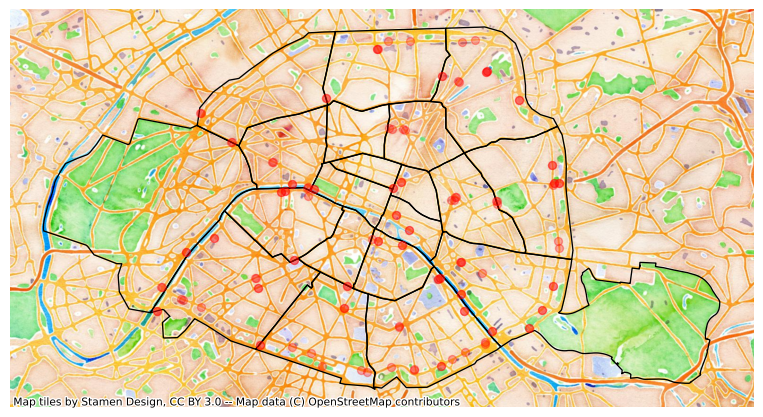

In [12]:
ax.get_figure()

<Axes: >

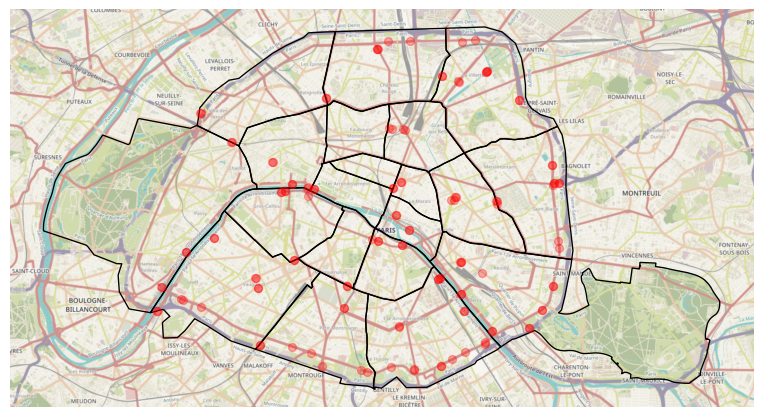

In [13]:
# 2. Choix d'un fond de carte plus approprié (visualisation des grands axes)
ax = arrondissements.to_crs("EPSG:3857").plot(edgecolor = 'black', facecolor="none", figsize = (10,10))
compteurs.to_crs("EPSG:3857").plot(ax = ax, alpha = 0.3, color = 'red')
ctx.add_basemap(ax, source="https://a.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png")
ax.set_axis_off()
ax

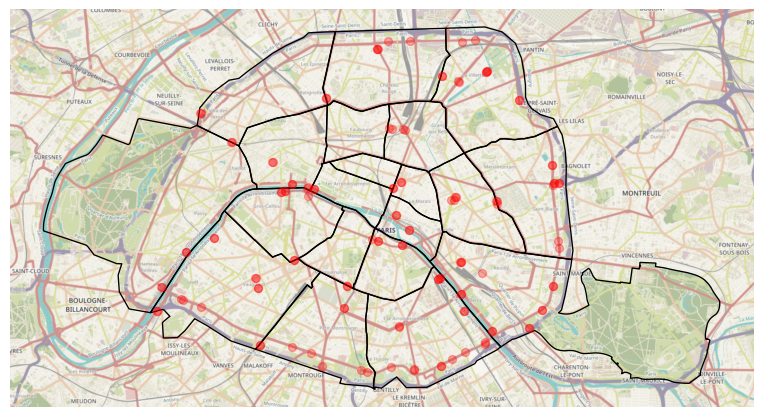

In [14]:
ax.get_figure()

In [15]:
ax.get_figure().savefig("featured.png")

Le principe de la *heatmap* est de construire, à partir d’un nuage de point bidimensionnel, une distribution 2D lissée. La méthode repose sur les estimateurs à noyaux qui sont des méthodes de lissage local.

<div class="alert alert-info" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #007bff80;">
<h3 class="alert-heading"><i class="fa fa-comment"></i> Exercice 3 : Ajouter un fonds de carte avec contextily</h3>

Pour le moment, la fonction `geoplot.kdeplot` n’incorpore pas toutes les fonctionalités de `seaborn.kdeplot`. Pour être en mesure de construire une `heatmap` avec des données pondérées (cf. [cette issue dans le dépôt seaborn](https://github.com/mwaskom/seaborn/issues/1364)), il y a une astuce. Il faut simuler *k* points de valeur 1 autour de la localisation observée. La fonction ci-dessous, qui m’a été bien utile, est pratique

``` python
import numpy as np
def expand_points(shapefile,
                  index_var = "grid_id",
                  weight_var = 'prop',
                  radius_sd = 100,
                  crs = 2154):
    """
    Multiply number of points to be able to have a weighted heatmap
    :param shapefile: Shapefile to consider
    :param index_var: Variable name to set index
    :param weight_var: Variable that should be used
    :param radius_sd: Standard deviation for the radius of the jitter
    :param crs: Projection system that should be used. Recommended option
      is Lambert 93 because points will be jitterized using meters
    :return:
      A geopandas point object with as many points by index as weight
    """

    shpcopy = shapefile
    shpcopy = shpcopy.set_index(index_var)
    shpcopy['npoints'] = np.ceil(shpcopy[weight_var])
    shpcopy['geometry'] = shpcopy['geometry'].centroid
    shpcopy['x'] = shpcopy.geometry.x
    shpcopy['y'] = shpcopy.geometry.y
    shpcopy = shpcopy.to_crs(crs)
    shpcopy = shpcopy.loc[np.repeat(shpcopy.index.values, shpcopy.npoints)]
    shpcopy['x'] = shpcopy['x'] + np.random.normal(0, radius_sd, shpcopy.shape[0])
    shpcopy['y'] = shpcopy['y'] + np.random.normal(0, radius_sd, shpcopy.shape[0])

    gdf = gpd.GeoDataFrame(
        shpcopy,
        geometry = gpd.points_from_xy(shpcopy.x, shpcopy.y),
        crs = crs)

    return gdf
```

</div>

<div class="alert alert-success" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #3fb618;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Exercice 4 : Data cleaning avant de pouvoir faire une heatmap</h3>

1.  Calculer le trafic moyen, pour chaque station, entre 7 heures et 10 heures (bornes incluses) et nommer cet objet `df1`. Faire la même chose, en nommant `df2`, pour le trafic entre 17 et 20 heures (bornes incluses)

2.  Nous allons désormais préparer les données de manière à faire une heatmap. Après avoir compris ce que permet de faire la fonction `expand_points` ci-dessus, créer une fonction `explode_data` qui suive les étapes suivantes.

-   Convertir un DataFrame dans le système de projection Lambert 93 (epsg: 2154)
-   Appliquer `expand_points` aux noms de variable adéquats. Vous pouvez fixer la valeur de `radius_sd` à `100`.
-   Reconvertir l’output au format WGS84 (epsg: 4326)

1.  Appliquer cette fonction à `df1` et `df2`

</div>

In [17]:
#1. Calcul du trafic moyen
comptages['timestamp'] = pd.to_datetime(comptages['Date et heure de comptage'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')
comptages['hour'] = comptages['timestamp'].dt.hour

df1 = comptages[comptages.hour.between(7,10)].groupby('Identifiant du compteur').agg({"Comptage horaire": "mean"}).reset_index()
df2 = comptages[comptages.hour.between(7,10)].groupby('Identifiant du compteur').agg({"Comptage horaire": "mean"}).reset_index()
df1 = compteurs.merge(df1, left_on = "id_compteur", right_on = 'Identifiant du compteur')
df2 = compteurs.merge(df2, left_on = "id_compteur", right_on = 'Identifiant du compteur')

In [18]:
#2. Creation de la fonction explode_data
## La fonction expand_points multiplie le nombre de points de manière à créer une heatmap
def explode_data(data, index_var = "id_compteur", weight_var = 'Comptage horaire', crs = 2154):
  data_exp = expand_points(data.to_crs(crs),
                  index_var = "id_compteur",
                  weight_var = 'Comptage horaire',
                  radius_sd = 100,
                  crs = crs)
  data_exp = data_exp.to_crs(4326)
  return data_exp

In [19]:
#3. Application de explode_data à df1 et df2
df1_exploded = explode_data(df1)
df2_exploded = explode_data(df2)

#print(len(df1))
#df1[["name","id_compteur"]].head()
#print(len(df1_exploded))
#df1_exploded[["name","npoints","x","y"]].head()

<div class="alert alert-success" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #3fb618;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Exercice 5 : Heatmap, enfin !</h3>

Représenter, pour ces deux moments de la journée, la `heatmap` du trafic de vélo avec `geoplot.kdeplot`. Pour cela :

-   Appliquer la fonction `geoplot.kdeplot` avec comme consignes :
    -   d’utiliser les arguments `shade=True` et `shade_lowest=True` pour colorer l’intérieur des courbes de niveaux obtenues ;
    -   d’utiliser une palette de couleur rouge avec une transparence modérée (`alpha = 0.6`)
    -   d’utiliser l’argument `clip` pour ne pas déborder hors de Paris (en cas de doute, se référer à l’aide de `geoplot.kdeplot`)
    -   L’argument `bw` (pour *bandwidth*) détermine le plus ou moins fort lissage spatial. Vous pouvez partir d’un bandwidth égal à 0.01 et le faire varier pour voir l’effet sur le résultat
-   Ne pas oublier d’ajouter les arrondissements. Avec `geoplot`, il faut utiliser `geoplot.polyplot`.

</div>

In [20]:
# Exercice 5 : heatmap
fig = plt.figure()
ax = geoplot.kdeplot(df1_exploded,
                      figsize=(10, 10),
                      shade=True, shade_lowest=True,
                      alpha = 0.6,
                      clip = arrondissements,
                      cmap="Reds",
                      bw=.35
                    )
# truc bizarre: bandwidth doit etre beaucoup plus fort sur ma machine windows que sur un notebook tournant sur linux
# pour produire résultat équivalent
geoplot.polyplot(arrondissements, ax = ax, zorder = 1)

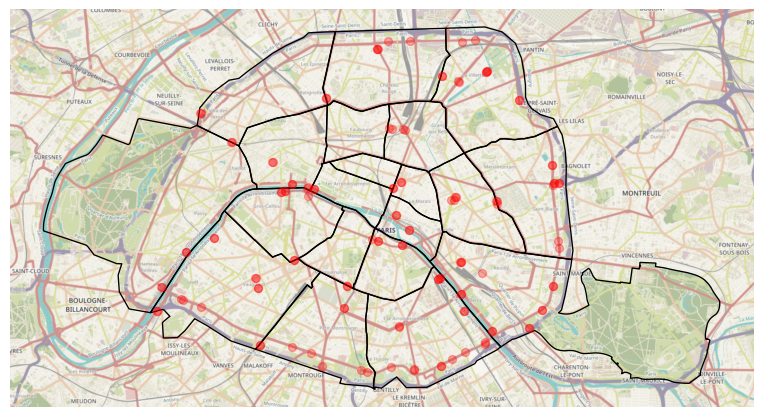

In [21]:
ax.get_figure()

## Des cartes réactives grâce à `folium`

De plus en plus de données de visualisation reposent sur la cartographie réactive. Que ce soit dans l’exploration des données ou dans la représentation finale de résultats, la cartographie réactive est très appréciable.

`folium` offre une interface très flexible et très facile à prendre à main. Les cartes sont construites grâce à la librairie JavaScript `Leaflet.js` mais, sauf si on désire aller loin dans la customisation du résultat, il n’est pas nécessaire d’avoir des notions dans le domaine.

Un objet folium se construit par couche. La première est l’initialisation de la carte. Les couches suivantes sont les éléments à mettre en valeur. L’initialisation de la carte nécessite la définition d’un point central (paramètre `location`) et d’un zoom de départ (`zoom_start`). Plutôt que de fournir manuellement le point central et le zoom on peut :

1.  Déterminer le point central en construisant des colonnes longitudes et latitudes et en prenant la moyenne de celles-ci ;
2.  Utiliser la méthode `fit_bounds` qui cale la carte sur les coins sud-ouest et nord-est. En supposant que la carte s’appelle `m`, on fera `m.fit_bounds([sw, ne])`

Le bout de code suivant permet de calculer le centre de la carte

In [22]:
compteurs['lon'] = compteurs.geometry.x
compteurs['lat'] = compteurs.geometry.y
center = compteurs[['lat', 'lon']].mean().values.tolist()
print(center)

[48.8546376796875, 2.349257265625]

Alors que le code suivant permet de calculer les coins:

In [23]:
sw = compteurs[['lat', 'lon']].min().values.tolist()
ne = compteurs[['lat', 'lon']].max().values.tolist()
print(sw, ne)

[48.81964, 2.26526] [48.898946, 2.41143]

<div class="alert alert-warning" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #ffc10780;">
<h3 class="alert-heading"><i class="fa fa-lightbulb-o"></i> Hint</h3>

Si un fond gris s’affiche, c’est qu’il y a un problème de localisation ou d’accès à internet. Pour le premier cas, cela provient généralement d’un problème de projection ou d’une inversion des longitudes et latitudes.

Les longitudes représentent les *x* (axe ouest-est) et les latitudes *y* (axe sud-nord). De manière contrintuitive, `folium` attend qu’on lui fournisse les données sous la forme `[latitude, longitude]` donc `[y,x]`

</div>

<div class="alert alert-success" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #3fb618;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Exercice 6 : Visualiser la localisation des stations</h3>

1.  Calculer le centre `center`de la carte des données `compteurs`. Il s’obtient en agrègeant l’ensemble des géométries, calculant le centroid et récupèrant la valeur sous forme de liste. Avec une logique similaire, calculez les bornes du sud-ouest `sw` et du nord-est `ne` de la carte.
2.  Représenter la localisation des stations en utilisant un zoom optimal.

</div>

In [24]:
#1. Calcul du centre de la carte de "compteurs" et des bornes sw et ne
compteurs['lon'] = compteurs.geometry.x
compteurs['lat'] = compteurs.geometry.y
center = compteurs[['lat', 'lon']].mean().values.tolist()
sw = compteurs[['lat', 'lon']].min().values.tolist()
ne = compteurs[['lat', 'lon']].max().values.tolist()

In [25]:
# 2. Carte interactive
from pathlib import Path
Path("leaflet").mkdir(parents=True, exist_ok=True)
m = folium.Map(location = center, tiles='Stamen Toner')

# Ajout des markers 1 à 1 sur la carte
for i in range(0,len(compteurs)):
    folium.Marker([compteurs.iloc[i]['lat'], compteurs.iloc[i]['lon']], popup=compteurs.iloc[i]['nom_compteur']).add_to(m)
m.fit_bounds([sw, ne])

<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><span style="color:#565656">Make this Notebook Trusted to load map: File -> Trust Notebook</span><iframe srcdoc="&lt;!DOCTYPE html&gt;
&lt;html&gt;
&lt;head&gt;
    
    &lt;meta http-equiv=&quot;content-type&quot; content=&quot;text/html; charset=UTF-8&quot; /&gt;
    
        &lt;script&gt;
            L_NO_TOUCH = false;
            L_DISABLE_3D = false;
        &lt;/script&gt;
    
    &lt;style&gt;html, body {width: 100%;height: 100%;margin: 0;padding: 0;}&lt;/style&gt;
    &lt;style&gt;#map {position:absolute;top:0;bottom:0;right:0;left:0;}&lt;/style&gt;
    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js&quot;&gt;&lt;/script&gt;
    &lt;script src=&quot;https://code.jquery.com/jquery-1.12.4.min.js&quot;&gt;&lt;/script&gt;
    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js&quot;&gt;&lt;/script&gt;
    &lt;script src=&quot;https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js&quot;&gt;&lt;/script&gt;
    &lt;link rel=&quot;stylesheet&quot; href=&quot;https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css&quot;/&gt;
    &lt;link rel=&quot;stylesheet&quot; href=&quot;https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css&quot;/&gt;
    &lt;link rel=&quot;stylesheet&quot; href=&quot;https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css&quot;/&gt;
    &lt;link rel=&quot;stylesheet&quot; href=&quot;https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css&quot;/&gt;
    &lt;link rel=&quot;stylesheet&quot; href=&quot;https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css&quot;/&gt;
    &lt;link rel=&quot;stylesheet&quot; href=&quot;https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css&quot;/&gt;
    
            &lt;meta name=&quot;viewport&quot; content=&quot;width=device-width,
                initial-scale=1.0, maximum-scale=1.0, user-scalable=no&quot; /&gt;
            &lt;style&gt;
                #map_b6a69ad4c3ab9061db4ab33452ad93b5 {
                    position: relative;
                    width: 100.0%;
                    height: 100.0%;
                    left: 0.0%;
                    top: 0.0%;
                }
                .leaflet-container { font-size: 1rem; }
            &lt;/style&gt;
        
&lt;/head&gt;
&lt;body&gt;
    
    
            &lt;div class=&quot;folium-map&quot; id=&quot;map_b6a69ad4c3ab9061db4ab33452ad93b5&quot; &gt;&lt;/div&gt;
        
&lt;/body&gt;
&lt;script&gt;
    
    
            var map_b6a69ad4c3ab9061db4ab33452ad93b5 = L.map(
                &quot;map_b6a69ad4c3ab9061db4ab33452ad93b5&quot;,
                {
                    center: [48.8546376796875, 2.349257265625],
                    crs: L.CRS.EPSG3857,
                    zoom: 10,
                    zoomControl: true,
                    preferCanvas: false,
                }
            );

            

        
    
            var tile_layer_a7cedd7c0f296efc7ef411f28e141a26 = L.tileLayer(
                &quot;https://stamen-tiles-{s}.a.ssl.fastly.net/toner/{z}/{x}/{y}.png&quot;,
                {&quot;attribution&quot;: &quot;Map tiles by \u003ca target=\&quot;_blank\&quot; href=\&quot;http://stamen.com\&quot;\u003eStamen Design\u003c/a\u003e, under \u003ca target=\&quot;_blank\&quot; href=\&quot;http://creativecommons.org/licenses/by/3.0\&quot;\u003eCC BY 3.0\u003c/a\u003e. Data by \u0026copy; \u003ca target=\&quot;_blank\&quot; href=\&quot;http://openstreetmap.org\&quot;\u003eOpenStreetMap\u003c/a\u003e, under \u003ca target=\&quot;_blank\&quot; href=\&quot;http://www.openstreetmap.org/copyright\&quot;\u003eODbL\u003c/a\u003e.&quot;, &quot;detectRetina&quot;: false, &quot;maxNativeZoom&quot;: 18, &quot;maxZoom&quot;: 18, &quot;minZoom&quot;: 0, &quot;noWrap&quot;: false, &quot;opacity&quot;: 1, &quot;subdomains&quot;: &quot;abc&quot;, &quot;tms&quot;: false}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
            var marker_9bba8f64b6360208ca89429b3bcac152 = L.marker(
                [48.83504, 2.33314],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_f1808350328b3da0ac82c5eb0a872cc5 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_43c907f46d2405a95d21c9beeca4c224 = $(`&lt;div id=&quot;html_43c907f46d2405a95d21c9beeca4c224&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;97 avenue Denfert Rochereau SO-NE&lt;/div&gt;`)[0];
                popup_f1808350328b3da0ac82c5eb0a872cc5.setContent(html_43c907f46d2405a95d21c9beeca4c224);
            
        

        marker_9bba8f64b6360208ca89429b3bcac152.bindPopup(popup_f1808350328b3da0ac82c5eb0a872cc5)
        ;

        
    
    
            var marker_61535670f2209ed24b885d9c29be5b97 = L.marker(
                [48.87773, 2.3506],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_95c1e534beaa2a55400b49e3f3fc6e42 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_d42838db1974b39e39e586413a3620a5 = $(`&lt;div id=&quot;html_d42838db1974b39e39e586413a3620a5&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;105 rue La Fayette E-O&lt;/div&gt;`)[0];
                popup_95c1e534beaa2a55400b49e3f3fc6e42.setContent(html_d42838db1974b39e39e586413a3620a5);
            
        

        marker_61535670f2209ed24b885d9c29be5b97.bindPopup(popup_95c1e534beaa2a55400b49e3f3fc6e42)
        ;

        
    
    
            var marker_bb0b656123fa9240a62156499bfa8c76 = L.marker(
                [48.83505, 2.33333],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_f7331d28e1f46f6906dfa103dd66144a = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_e0e11576c737ca5d2cfe205deaa2f925 = $(`&lt;div id=&quot;html_e0e11576c737ca5d2cfe205deaa2f925&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;106 avenue Denfert Rochereau NE-SO&lt;/div&gt;`)[0];
                popup_f7331d28e1f46f6906dfa103dd66144a.setContent(html_e0e11576c737ca5d2cfe205deaa2f925);
            
        

        marker_bb0b656123fa9240a62156499bfa8c76.bindPopup(popup_f7331d28e1f46f6906dfa103dd66144a)
        ;

        
    
    
            var marker_fc9362c036fed719beb986bd35949d2b = L.marker(
                [48.87813, 2.3497],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_77c357351db47d444d8f5e7d341232ab = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_b0bacd5041b09a83066d482e6ee240df = $(`&lt;div id=&quot;html_b0bacd5041b09a83066d482e6ee240df&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;100 rue La Fayette O-E&lt;/div&gt;`)[0];
                popup_77c357351db47d444d8f5e7d341232ab.setContent(html_b0bacd5041b09a83066d482e6ee240df);
            
        

        marker_fc9362c036fed719beb986bd35949d2b.bindPopup(popup_77c357351db47d444d8f5e7d341232ab)
        ;

        
    
    
            var marker_34245101ab03aae9f5dd712e491942c5 = L.marker(
                [48.843435, 2.383378],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_1746d88ef2746234b93e2352eb2e94d2 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_e00fcc6916ce93a89cfda4c740cd236b = $(`&lt;div id=&quot;html_e00fcc6916ce93a89cfda4c740cd236b&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;135 avenue Daumesnil SE-NO&lt;/div&gt;`)[0];
                popup_1746d88ef2746234b93e2352eb2e94d2.setContent(html_e00fcc6916ce93a89cfda4c740cd236b);
            
        

        marker_34245101ab03aae9f5dd712e491942c5.bindPopup(popup_1746d88ef2746234b93e2352eb2e94d2)
        ;

        
    
    
            var marker_59217d8b966ca73b72b09677cef6ff8b = L.marker(
                [48.84613, 2.37559],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_23356fed43e6aebd325ddc25320abfcd = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_2dc95b58396468a965ee53ea88e45d91 = $(`&lt;div id=&quot;html_2dc95b58396468a965ee53ea88e45d91&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;28 boulevard Diderot O-E&lt;/div&gt;`)[0];
                popup_23356fed43e6aebd325ddc25320abfcd.setContent(html_2dc95b58396468a965ee53ea88e45d91);
            
        

        marker_59217d8b966ca73b72b09677cef6ff8b.bindPopup(popup_23356fed43e6aebd325ddc25320abfcd)
        ;

        
    
    
            var marker_06015693b98b411476ca7b6461dfc3c6 = L.marker(
                [48.84613, 2.37559],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_b8cc6a71d3c78eb7a2e7f6732bc94d89 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_8c1850cc94e2804ab9855b5acaa512b1 = $(`&lt;div id=&quot;html_8c1850cc94e2804ab9855b5acaa512b1&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;28 boulevard Diderot E-O&lt;/div&gt;`)[0];
                popup_b8cc6a71d3c78eb7a2e7f6732bc94d89.setContent(html_8c1850cc94e2804ab9855b5acaa512b1);
            
        

        marker_06015693b98b411476ca7b6461dfc3c6.bindPopup(popup_b8cc6a71d3c78eb7a2e7f6732bc94d89)
        ;

        
    
    
            var marker_d59c087acfe12714748e4ba20db432b2 = L.marker(
                [48.83436, 2.377],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_78f8ebb0cba48e8ad04a58e3596b78a1 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_5d267fafcbd60c4a159763963c166fab = $(`&lt;div id=&quot;html_5d267fafcbd60c4a159763963c166fab&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;39 quai François Mauriac SE-NO&lt;/div&gt;`)[0];
                popup_78f8ebb0cba48e8ad04a58e3596b78a1.setContent(html_5d267fafcbd60c4a159763963c166fab);
            
        

        marker_d59c087acfe12714748e4ba20db432b2.bindPopup(popup_78f8ebb0cba48e8ad04a58e3596b78a1)
        ;

        
    
    
            var marker_68b5d662eae9e199e6e6ad827cdb20ba = L.marker(
                [48.83436, 2.377],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_1c526c35b87a056ee34379357c228ee3 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_92d50b182c4ced2cd6692b09ef6ba750 = $(`&lt;div id=&quot;html_92d50b182c4ced2cd6692b09ef6ba750&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;39 quai François Mauriac NO-SE&lt;/div&gt;`)[0];
                popup_1c526c35b87a056ee34379357c228ee3.setContent(html_92d50b182c4ced2cd6692b09ef6ba750);
            
        

        marker_68b5d662eae9e199e6e6ad827cdb20ba.bindPopup(popup_1c526c35b87a056ee34379357c228ee3)
        ;

        
    
    
            var marker_9412a0a907c2d240c6578601bb32add9 = L.marker(
                [48.85372, 2.35702],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_371f102e9314f09b82f86c36cd742737 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_28373112f0665e4c3db9536274759d27 = $(`&lt;div id=&quot;html_28373112f0665e4c3db9536274759d27&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;18 quai de l&#x27;Hôtel de Ville SE-NO&lt;/div&gt;`)[0];
                popup_371f102e9314f09b82f86c36cd742737.setContent(html_28373112f0665e4c3db9536274759d27);
            
        

        marker_9412a0a907c2d240c6578601bb32add9.bindPopup(popup_371f102e9314f09b82f86c36cd742737)
        ;

        
    
    
            var marker_73e5f7ca9dfb113baf2b62275f99591f = L.marker(
                [48.85372, 2.35702],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_e3510e19e3f24b4e0ca17fa23f63544b = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_391fdd4d87a1c06a0199f2930ce37454 = $(`&lt;div id=&quot;html_391fdd4d87a1c06a0199f2930ce37454&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;18 quai de l&#x27;Hôtel de Ville NO-SE&lt;/div&gt;`)[0];
                popup_e3510e19e3f24b4e0ca17fa23f63544b.setContent(html_391fdd4d87a1c06a0199f2930ce37454);
            
        

        marker_73e5f7ca9dfb113baf2b62275f99591f.bindPopup(popup_e3510e19e3f24b4e0ca17fa23f63544b)
        ;

        
    
    
            var marker_f6abef227699280e8e1232b0b5e88d5f = L.marker(
                [48.846099, 2.375456],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_a005e565028f3cf0c0ec6e000527f39a = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_c5448014a4df66b1021cd8bd4ae20705 = $(`&lt;div id=&quot;html_c5448014a4df66b1021cd8bd4ae20705&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;27 boulevard Diderot E-O&lt;/div&gt;`)[0];
                popup_a005e565028f3cf0c0ec6e000527f39a.setContent(html_c5448014a4df66b1021cd8bd4ae20705);
            
        

        marker_f6abef227699280e8e1232b0b5e88d5f.bindPopup(popup_a005e565028f3cf0c0ec6e000527f39a)
        ;

        
    
    
            var marker_01a804a4cdc34648c5208e400c826d4a = L.marker(
                [48.84837, 2.27596],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_5eefcf7fe5273e27bfb03a60f1ec03c0 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_300839a326e87aec3b79d0d5d870b9b8 = $(`&lt;div id=&quot;html_300839a326e87aec3b79d0d5d870b9b8&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Voie Georges Pompidou SO-NE&lt;/div&gt;`)[0];
                popup_5eefcf7fe5273e27bfb03a60f1ec03c0.setContent(html_300839a326e87aec3b79d0d5d870b9b8);
            
        

        marker_01a804a4cdc34648c5208e400c826d4a.bindPopup(popup_5eefcf7fe5273e27bfb03a60f1ec03c0)
        ;

        
    
    
            var marker_e60824c28091e2669d1ca9bd7c378b2d = L.marker(
                [48.84837, 2.27596],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_7755baeab39afbb7e4e57064ba1cd7a2 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_ad1b5bb096a61d2909be30bf2fdfa18f = $(`&lt;div id=&quot;html_ad1b5bb096a61d2909be30bf2fdfa18f&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Voie Georges Pompidou NE-SO&lt;/div&gt;`)[0];
                popup_7755baeab39afbb7e4e57064ba1cd7a2.setContent(html_ad1b5bb096a61d2909be30bf2fdfa18f);
            
        

        marker_e60824c28091e2669d1ca9bd7c378b2d.bindPopup(popup_7755baeab39afbb7e4e57064ba1cd7a2)
        ;

        
    
    
            var marker_c1c540d0a77349c44216f9e04ae1f530 = L.marker(
                [48.86149, 2.37376],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_3c261bd9fd8f380a4b72578cffa4daa9 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_0f08ca44f3cf811305884915f96f2be5 = $(`&lt;div id=&quot;html_0f08ca44f3cf811305884915f96f2be5&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;67 boulevard Voltaire SE-NO&lt;/div&gt;`)[0];
                popup_3c261bd9fd8f380a4b72578cffa4daa9.setContent(html_0f08ca44f3cf811305884915f96f2be5);
            
        

        marker_c1c540d0a77349c44216f9e04ae1f530.bindPopup(popup_3c261bd9fd8f380a4b72578cffa4daa9)
        ;

        
    
    
            var marker_9dd1da629aabdda7cfb2ed48d3ef171f = L.marker(
                [48.8748, 2.2924],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_e8ff978a1f11f0678276cb4aae0643e4 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_4bf3a892dbf10e303b2589b0accdaf37 = $(`&lt;div id=&quot;html_4bf3a892dbf10e303b2589b0accdaf37&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;10 avenue de la Grande Armée SE-NO&lt;/div&gt;`)[0];
                popup_e8ff978a1f11f0678276cb4aae0643e4.setContent(html_4bf3a892dbf10e303b2589b0accdaf37);
            
        

        marker_9dd1da629aabdda7cfb2ed48d3ef171f.bindPopup(popup_e8ff978a1f11f0678276cb4aae0643e4)
        ;

        
    
    
            var marker_80ccfc3141bbc352e9aa8d8c78502463 = L.marker(
                [48.87474, 2.29219],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_f2eeae4c1e263f5b82e2c097f4f5585d = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_6506382c95f16d851cd690cf8fe12c1b = $(`&lt;div id=&quot;html_6506382c95f16d851cd690cf8fe12c1b&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;7 avenue de la Grande Armée NO-SE&lt;/div&gt;`)[0];
                popup_f2eeae4c1e263f5b82e2c097f4f5585d.setContent(html_6506382c95f16d851cd690cf8fe12c1b);
            
        

        marker_80ccfc3141bbc352e9aa8d8c78502463.bindPopup(popup_f2eeae4c1e263f5b82e2c097f4f5585d)
        ;

        
    
    
            var marker_d63e0d6b082d8e364dd8b74ce2b0b81e = L.marker(
                [48.86155, 2.37407],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_ae725ae784ff75b4645bd260b01a950f = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_6a116b90fcddfd739efd6d6ae11ecb04 = $(`&lt;div id=&quot;html_6a116b90fcddfd739efd6d6ae11ecb04&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;72 boulevard Voltaire NO-SE&lt;/div&gt;`)[0];
                popup_ae725ae784ff75b4645bd260b01a950f.setContent(html_6a116b90fcddfd739efd6d6ae11ecb04);
            
        

        marker_d63e0d6b082d8e364dd8b74ce2b0b81e.bindPopup(popup_ae725ae784ff75b4645bd260b01a950f)
        ;

        
    
    
            var marker_0b4b9094028e485c4469a7197c8b4ef2 = L.marker(
                [48.87756, 2.35535],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_f6c173e8736e367fe1e608c9ef23dadc = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_a2bca2a7b29c43d689931295acd86909 = $(`&lt;div id=&quot;html_a2bca2a7b29c43d689931295acd86909&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;89 boulevard de Magenta NO-SE&lt;/div&gt;`)[0];
                popup_f6c173e8736e367fe1e608c9ef23dadc.setContent(html_a2bca2a7b29c43d689931295acd86909);
            
        

        marker_0b4b9094028e485c4469a7197c8b4ef2.bindPopup(popup_f6c173e8736e367fe1e608c9ef23dadc)
        ;

        
    
    
            var marker_29ee4c1bb6fdc96740b4e3f859f525bf = L.marker(
                [48.88156, 2.28122],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_32cee5696174453610429cae60bea349 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_7f9e0d2a1504ff9b50b7a068852daabc = $(`&lt;div id=&quot;html_7f9e0d2a1504ff9b50b7a068852daabc&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;16 avenue de la Porte des Ternes E-O&lt;/div&gt;`)[0];
                popup_32cee5696174453610429cae60bea349.setContent(html_7f9e0d2a1504ff9b50b7a068852daabc);
            
        

        marker_29ee4c1bb6fdc96740b4e3f859f525bf.bindPopup(popup_32cee5696174453610429cae60bea349)
        ;

        
    
    
            var marker_7a4846d0c763f78a074466af7d7e4fe7 = L.marker(
                [48.83994, 2.26692],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_755b0e4f71964b9038cbbf4e0b4f74f8 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_875fd5dc6acf20322484c8f7bc5dd9a2 = $(`&lt;div id=&quot;html_875fd5dc6acf20322484c8f7bc5dd9a2&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Pont du Garigliano NO-SE&lt;/div&gt;`)[0];
                popup_755b0e4f71964b9038cbbf4e0b4f74f8.setContent(html_875fd5dc6acf20322484c8f7bc5dd9a2);
            
        

        marker_7a4846d0c763f78a074466af7d7e4fe7.bindPopup(popup_755b0e4f71964b9038cbbf4e0b4f74f8)
        ;

        
    
    
            var marker_6038cca496da40128f3a5a189f5e6178 = L.marker(
                [48.87769, 2.35475],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_4ea2eb9218c9f09a6784cd5503dcf8b5 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_fd67ac5defed917e6ab40820174a7ca3 = $(`&lt;div id=&quot;html_fd67ac5defed917e6ab40820174a7ca3&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;102 boulevard de Magenta SE-NO&lt;/div&gt;`)[0];
                popup_4ea2eb9218c9f09a6784cd5503dcf8b5.setContent(html_fd67ac5defed917e6ab40820174a7ca3);
            
        

        marker_6038cca496da40128f3a5a189f5e6178.bindPopup(popup_4ea2eb9218c9f09a6784cd5503dcf8b5)
        ;

        
    
    
            var marker_b7cd11ce959858749336922898667f39 = L.marker(
                [48.86057, 2.38886],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_799133d914d6a7c95ff660bf3fb55c48 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_d5f01cdd505c4881e970c5386876b272 = $(`&lt;div id=&quot;html_d5f01cdd505c4881e970c5386876b272&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;26 boulevard de Ménilmontant SE-NO&lt;/div&gt;`)[0];
                popup_799133d914d6a7c95ff660bf3fb55c48.setContent(html_d5f01cdd505c4881e970c5386876b272);
            
        

        marker_b7cd11ce959858749336922898667f39.bindPopup(popup_799133d914d6a7c95ff660bf3fb55c48)
        ;

        
    
    
            var marker_eab1589230b741807bc862e20af38e75 = L.marker(
                [48.88168, 2.28113],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_aeeee16c25f9ae588cfb8f2049da860a = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_989fd6aee6ff8654d6c1c06938f0a52e = $(`&lt;div id=&quot;html_989fd6aee6ff8654d6c1c06938f0a52e&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Face au 16 avenue de la  Porte des Ternes O-E&lt;/div&gt;`)[0];
                popup_aeeee16c25f9ae588cfb8f2049da860a.setContent(html_989fd6aee6ff8654d6c1c06938f0a52e);
            
        

        marker_eab1589230b741807bc862e20af38e75.bindPopup(popup_aeeee16c25f9ae588cfb8f2049da860a)
        ;

        
    
    
            var marker_4cfa864904807b7010710eea82a5eb37 = L.marker(
                [48.83043, 2.35335],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_9749a193d14e80062c594c99e8430f4a = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_6a8ae76374b53467b16d71321892d958 = $(`&lt;div id=&quot;html_6a8ae76374b53467b16d71321892d958&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;21 boulevard Auguste Blanqui SO-NE&lt;/div&gt;`)[0];
                popup_9749a193d14e80062c594c99e8430f4a.setContent(html_6a8ae76374b53467b16d71321892d958);
            
        

        marker_4cfa864904807b7010710eea82a5eb37.bindPopup(popup_9749a193d14e80062c594c99e8430f4a)
        ;

        
    
    
            var marker_d02c33a77747faf27ca2a4deff3ddab4 = L.marker(
                [48.86077, 2.37305],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_eb92e9a5547fd14cd69a4672043f78d9 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_dddfc92ccf9325fdda55006d0a604597 = $(`&lt;div id=&quot;html_dddfc92ccf9325fdda55006d0a604597&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;72 boulevard Richard Lenoir S-N&lt;/div&gt;`)[0];
                popup_eb92e9a5547fd14cd69a4672043f78d9.setContent(html_dddfc92ccf9325fdda55006d0a604597);
            
        

        marker_d02c33a77747faf27ca2a4deff3ddab4.bindPopup(popup_eb92e9a5547fd14cd69a4672043f78d9)
        ;

        
    
    
            var marker_0d2d2d233be53de695784800728e532f = L.marker(
                [48.82639, 2.38448],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_7c507f36d5c196474d326b053662a572 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_d7aeee69dbc79de770ad9506e96f4bf2 = $(`&lt;div id=&quot;html_d7aeee69dbc79de770ad9506e96f4bf2&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Pont National SO-NE&lt;/div&gt;`)[0];
                popup_7c507f36d5c196474d326b053662a572.setContent(html_d7aeee69dbc79de770ad9506e96f4bf2);
            
        

        marker_0d2d2d233be53de695784800728e532f.bindPopup(popup_7c507f36d5c196474d326b053662a572)
        ;

        
    
    
            var marker_01815842c1b4913d8e68ded07515e098 = L.marker(
                [48.89172, 2.38531],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_9b9f83b733f1c873a9f96e08cc87b798 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_8ca7ef73ec892e60bab74de9b42c4ef1 = $(`&lt;div id=&quot;html_8ca7ef73ec892e60bab74de9b42c4ef1&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Face au 48 quai de la marne NE-SO&lt;/div&gt;`)[0];
                popup_9b9f83b733f1c873a9f96e08cc87b798.setContent(html_8ca7ef73ec892e60bab74de9b42c4ef1);
            
        

        marker_01815842c1b4913d8e68ded07515e098.bindPopup(popup_9b9f83b733f1c873a9f96e08cc87b798)
        ;

        
    
    
            var marker_32bc89dd6c7291db0461c0f978dbd8de = L.marker(
                [48.89172, 2.38531],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_9ec75f484c0740d1d68d1e1b41fbe960 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_d782d2616296cb834663a3d4d16bcfd2 = $(`&lt;div id=&quot;html_d782d2616296cb834663a3d4d16bcfd2&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Face au 48 quai de la marne SO-NE&lt;/div&gt;`)[0];
                popup_9ec75f484c0740d1d68d1e1b41fbe960.setContent(html_d782d2616296cb834663a3d4d16bcfd2);
            
        

        marker_32bc89dd6c7291db0461c0f978dbd8de.bindPopup(popup_9ec75f484c0740d1d68d1e1b41fbe960)
        ;

        
    
    
            var marker_98c45c4961ed9c19d88b4300cf865062 = L.marker(
                [48.860852, 2.372279],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_791f7dca0b76904f6dbbe8f060acb061 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_0eee039617136de896e6c47c26b56de6 = $(`&lt;div id=&quot;html_0eee039617136de896e6c47c26b56de6&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;77 boulevard Richard Lenoir N-S&lt;/div&gt;`)[0];
                popup_791f7dca0b76904f6dbbe8f060acb061.setContent(html_0eee039617136de896e6c47c26b56de6);
            
        

        marker_98c45c4961ed9c19d88b4300cf865062.bindPopup(popup_791f7dca0b76904f6dbbe8f060acb061)
        ;

        
    
    
            var marker_cc99da72cd5dcb95024bf0783ce4b3b6 = L.marker(
                [48.890457, 2.368852],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_fab5e1ada7464dfd95fe2fde3bb750be = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_5739db36ab3a65b762f0acb551a5001b = $(`&lt;div id=&quot;html_5739db36ab3a65b762f0acb551a5001b&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Face 104 rue d&#x27;Aubervilliers N-S&lt;/div&gt;`)[0];
                popup_fab5e1ada7464dfd95fe2fde3bb750be.setContent(html_5739db36ab3a65b762f0acb551a5001b);
            
        

        marker_cc99da72cd5dcb95024bf0783ce4b3b6.bindPopup(popup_fab5e1ada7464dfd95fe2fde3bb750be)
        ;

        
    
    
            var marker_6a98a5426af6f9eb31fcaca6a4f5ce00 = L.marker(
                [48.890457, 2.368852],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_3022ded24648082f02229093c7a43279 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_68478fc1502045cf2f5cc6649cdcc6e2 = $(`&lt;div id=&quot;html_68478fc1502045cf2f5cc6649cdcc6e2&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Face 104 rue d&#x27;Aubervilliers S-N&lt;/div&gt;`)[0];
                popup_3022ded24648082f02229093c7a43279.setContent(html_68478fc1502045cf2f5cc6649cdcc6e2);
            
        

        marker_6a98a5426af6f9eb31fcaca6a4f5ce00.bindPopup(popup_3022ded24648082f02229093c7a43279)
        ;

        
    
    
            var marker_67890cfe56af424cef43545cc9baf488 = L.marker(
                [48.829523, 2.38699],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_c17e159faffd35fcad5baab2e775412a = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_76b72bd4d3440a11ee0f6722ff826d58 = $(`&lt;div id=&quot;html_76b72bd4d3440a11ee0f6722ff826d58&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Face au 70 quai de Bercy S-N&lt;/div&gt;`)[0];
                popup_c17e159faffd35fcad5baab2e775412a.setContent(html_76b72bd4d3440a11ee0f6722ff826d58);
            
        

        marker_67890cfe56af424cef43545cc9baf488.bindPopup(popup_c17e159faffd35fcad5baab2e775412a)
        ;

        
    
    
            var marker_fbe3f68d5c6581ecae4a4bcebfaa43e4 = L.marker(
                [48.829523, 2.38699],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_3de9387dc41be35d9d475f8f2fb59224 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_2daae66a1c2fded005b69a8330a8bbd4 = $(`&lt;div id=&quot;html_2daae66a1c2fded005b69a8330a8bbd4&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Face au 70 quai de Bercy N-S&lt;/div&gt;`)[0];
                popup_3de9387dc41be35d9d475f8f2fb59224.setContent(html_2daae66a1c2fded005b69a8330a8bbd4);
            
        

        marker_fbe3f68d5c6581ecae4a4bcebfaa43e4.bindPopup(popup_3de9387dc41be35d9d475f8f2fb59224)
        ;

        
    
    
            var marker_3e4c1656097940310276623bf5b81502 = L.marker(
                [48.82624, 2.30281],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_d98d78205d495415a8a4f4725fdccf1f = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_453536a0f42bc78b4e0d2484082048ea = $(`&lt;div id=&quot;html_453536a0f42bc78b4e0d2484082048ea&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;6 rue Julia Bartet SO-NE&lt;/div&gt;`)[0];
                popup_d98d78205d495415a8a4f4725fdccf1f.setContent(html_453536a0f42bc78b4e0d2484082048ea);
            
        

        marker_3e4c1656097940310276623bf5b81502.bindPopup(popup_d98d78205d495415a8a4f4725fdccf1f)
        ;

        
    
    
            var marker_a7614ff7da63255ad0d702ff1a19d737 = L.marker(
                [48.82624, 2.30281],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_825670d92261e206216a2f945a24539b = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_7ac2fcf8a5a1405a338e1b54405146ea = $(`&lt;div id=&quot;html_7ac2fcf8a5a1405a338e1b54405146ea&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;6 rue Julia Bartet NE-SO&lt;/div&gt;`)[0];
                popup_825670d92261e206216a2f945a24539b.setContent(html_7ac2fcf8a5a1405a338e1b54405146ea);
            
        

        marker_a7614ff7da63255ad0d702ff1a19d737.bindPopup(popup_825670d92261e206216a2f945a24539b)
        ;

        
    
    
            var marker_689fd2d634fd0af03bd679aa2183dc04 = L.marker(
                [48.89141, 2.38482],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_c47aadfe5800e37017bd5c1fa80fcadb = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_d1a03436ff3ea2e6e38bbd5110e9e151 = $(`&lt;div id=&quot;html_d1a03436ff3ea2e6e38bbd5110e9e151&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Face au 25 quai de l&#x27;Oise NE-SO&lt;/div&gt;`)[0];
                popup_c47aadfe5800e37017bd5c1fa80fcadb.setContent(html_d1a03436ff3ea2e6e38bbd5110e9e151);
            
        

        marker_689fd2d634fd0af03bd679aa2183dc04.bindPopup(popup_c47aadfe5800e37017bd5c1fa80fcadb)
        ;

        
    
    
            var marker_ae3f53861accd4528ed28cf951a609e0 = L.marker(
                [48.89141, 2.38482],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_e04e20c01bf4df8177bafc985cbfc45a = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_1af8572490fdb1adf8346d13d1d2ff78 = $(`&lt;div id=&quot;html_1af8572490fdb1adf8346d13d1d2ff78&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Face au 25 quai de l&#x27;Oise SO-NE&lt;/div&gt;`)[0];
                popup_e04e20c01bf4df8177bafc985cbfc45a.setContent(html_1af8572490fdb1adf8346d13d1d2ff78);
            
        

        marker_ae3f53861accd4528ed28cf951a609e0.bindPopup(popup_e04e20c01bf4df8177bafc985cbfc45a)
        ;

        
    
    
            var marker_5208d046b9877696d811d8ba93399fdd = L.marker(
                [48.82682, 2.38465],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_13a7b496b92886295a274ef4f63431e2 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_06b571550836551b6757681f89964efc = $(`&lt;div id=&quot;html_06b571550836551b6757681f89964efc&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Pont National NE-SO&lt;/div&gt;`)[0];
                popup_13a7b496b92886295a274ef4f63431e2.setContent(html_06b571550836551b6757681f89964efc);
            
        

        marker_5208d046b9877696d811d8ba93399fdd.bindPopup(popup_13a7b496b92886295a274ef4f63431e2)
        ;

        
    
    
            var marker_6575d833131a8b4615f13d11cbed83eb = L.marker(
                [48.83992, 2.26708],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_5658d7f586b58218c10a2c73e6d6174e = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_21ebe1b755a2afd3c4972faeb0d90b69 = $(`&lt;div id=&quot;html_21ebe1b755a2afd3c4972faeb0d90b69&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Pont du Garigliano SE-NO&lt;/div&gt;`)[0];
                popup_5658d7f586b58218c10a2c73e6d6174e.setContent(html_21ebe1b755a2afd3c4972faeb0d90b69);
            
        

        marker_6575d833131a8b4615f13d11cbed83eb.bindPopup(popup_5658d7f586b58218c10a2c73e6d6174e)
        ;

        
    
    
            var marker_d8778a0e5100ab771911ca91166a32c2 = L.marker(
                [48.84017, 2.33438],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_ceb32e5a86faac97507e4b79f82a12a6 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_1d096b3d3f2137424ecc035ab0f32762 = $(`&lt;div id=&quot;html_1d096b3d3f2137424ecc035ab0f32762&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;152 boulevard du Montparnasse O-E&lt;/div&gt;`)[0];
                popup_ceb32e5a86faac97507e4b79f82a12a6.setContent(html_1d096b3d3f2137424ecc035ab0f32762);
            
        

        marker_d8778a0e5100ab771911ca91166a32c2.bindPopup(popup_ceb32e5a86faac97507e4b79f82a12a6)
        ;

        
    
    
            var marker_1c2cb49de323fff3e44476b3eb043be5 = L.marker(
                [48.84017, 2.33438],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_6d4ab2186720b207406ba587fb5624d2 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_ae7691a2d927a690b76a7a5d22ffc85e = $(`&lt;div id=&quot;html_ae7691a2d927a690b76a7a5d22ffc85e&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;152 boulevard du Montparnasse E-O&lt;/div&gt;`)[0];
                popup_6d4ab2186720b207406ba587fb5624d2.setContent(html_ae7691a2d927a690b76a7a5d22ffc85e);
            
        

        marker_1c2cb49de323fff3e44476b3eb043be5.bindPopup(popup_6d4ab2186720b207406ba587fb5624d2)
        ;

        
    
    
            var marker_09baab491392ce6b1cba8c9f8f5e64df = L.marker(
                [48.83082, 2.35317],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_285dfd0051f4d85f2a428fe9c3529d6a = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_20751ee446b5195170271f3107f8f068 = $(`&lt;div id=&quot;html_20751ee446b5195170271f3107f8f068&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;10 boulevard Auguste Blanqui NE-SO&lt;/div&gt;`)[0];
                popup_285dfd0051f4d85f2a428fe9c3529d6a.setContent(html_20751ee446b5195170271f3107f8f068);
            
        

        marker_09baab491392ce6b1cba8c9f8f5e64df.bindPopup(popup_285dfd0051f4d85f2a428fe9c3529d6a)
        ;

        
    
    
            var marker_0992767bc562a651e33aac56cc69ff7f = L.marker(
                [48.86179, 2.32014],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_7088ea1ae41eba6cbb316208a0ebba6b = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_f4ba2a3f65f94693bae3d27a6b3ed554 = $(`&lt;div id=&quot;html_f4ba2a3f65f94693bae3d27a6b3ed554&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;243 boulevard Saint Germain NO-SE&lt;/div&gt;`)[0];
                popup_7088ea1ae41eba6cbb316208a0ebba6b.setContent(html_f4ba2a3f65f94693bae3d27a6b3ed554);
            
        

        marker_0992767bc562a651e33aac56cc69ff7f.bindPopup(popup_7088ea1ae41eba6cbb316208a0ebba6b)
        ;

        
    
    
            var marker_657195e28cf34eb02b4f4d6969953cf1 = L.marker(
                [48.85735, 2.35211],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_b38bf0c9a489125b07c29428604a39c3 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_aa23818622a60f21cef0648633c298fb = $(`&lt;div id=&quot;html_aa23818622a60f21cef0648633c298fb&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Totem 64 Rue de Rivoli E-O&lt;/div&gt;`)[0];
                popup_b38bf0c9a489125b07c29428604a39c3.setContent(html_aa23818622a60f21cef0648633c298fb);
            
        

        marker_657195e28cf34eb02b4f4d6969953cf1.bindPopup(popup_b38bf0c9a489125b07c29428604a39c3)
        ;

        
    
    
            var marker_181dfa4fe33ca5112149d5c0487fcc2a = L.marker(
                [48.85735, 2.35211],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_22bc54ace8015845be5058f424bb907c = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_d6c41c260011296f3f8ecb34d6e849d4 = $(`&lt;div id=&quot;html_d6c41c260011296f3f8ecb34d6e849d4&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Totem 64 Rue de Rivoli O-E&lt;/div&gt;`)[0];
                popup_22bc54ace8015845be5058f424bb907c.setContent(html_d6c41c260011296f3f8ecb34d6e849d4);
            
        

        marker_181dfa4fe33ca5112149d5c0487fcc2a.bindPopup(popup_22bc54ace8015845be5058f424bb907c)
        ;

        
    
    
            var marker_c372ae92abb297470654f470184ad234 = L.marker(
                [48.88926, 2.37472],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_52ffafb5848264fa8fe39793c2ea854e = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_743e7d70ca1b072294282038aca36a6d = $(`&lt;div id=&quot;html_743e7d70ca1b072294282038aca36a6d&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;87 avenue de Flandre NE-SO&lt;/div&gt;`)[0];
                popup_52ffafb5848264fa8fe39793c2ea854e.setContent(html_743e7d70ca1b072294282038aca36a6d);
            
        

        marker_c372ae92abb297470654f470184ad234.bindPopup(popup_52ffafb5848264fa8fe39793c2ea854e)
        ;

        
    
    
            var marker_be175e9cb2d70f05d98db816e1899db4 = L.marker(
                [48.889046, 2.374872],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_08796050d857877dc25d3b0d894d1c70 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_40de4059e04d1587f4a61effd6c99e60 = $(`&lt;div id=&quot;html_40de4059e04d1587f4a61effd6c99e60&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;72 avenue de Flandre SO-NE&lt;/div&gt;`)[0];
                popup_08796050d857877dc25d3b0d894d1c70.setContent(html_40de4059e04d1587f4a61effd6c99e60);
            
        

        marker_be175e9cb2d70f05d98db816e1899db4.bindPopup(popup_08796050d857877dc25d3b0d894d1c70)
        ;

        
    
    
            var marker_9ce26eebe5c2db96d274c31a29f7b4a0 = L.marker(
                [48.8635, 2.32239],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_c5db1919c293662b2224fb5fa28f24e5 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_21eb632e1e2b38a6ad706e09a83a3e21 = $(`&lt;div id=&quot;html_21eb632e1e2b38a6ad706e09a83a3e21&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Quai des Tuileries SE-NO&lt;/div&gt;`)[0];
                popup_c5db1919c293662b2224fb5fa28f24e5.setContent(html_21eb632e1e2b38a6ad706e09a83a3e21);
            
        

        marker_9ce26eebe5c2db96d274c31a29f7b4a0.bindPopup(popup_c5db1919c293662b2224fb5fa28f24e5)
        ;

        
    
    
            var marker_de0870d0b85fcea56ad99ad3c3028209 = L.marker(
                [48.8635, 2.32239],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_112c2d3a85aaaf213139d72e0a519d5c = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_90268a82ecbbd1f070c8956f0953f726 = $(`&lt;div id=&quot;html_90268a82ecbbd1f070c8956f0953f726&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Quai des Tuileries NO-SE&lt;/div&gt;`)[0];
                popup_112c2d3a85aaaf213139d72e0a519d5c.setContent(html_90268a82ecbbd1f070c8956f0953f726);
            
        

        marker_de0870d0b85fcea56ad99ad3c3028209.bindPopup(popup_112c2d3a85aaaf213139d72e0a519d5c)
        ;

        
    
    
            var marker_6680a9272a2b7a7cd4ee5e1a34aae93f = L.marker(
                [48.86451, 2.40932],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_9055d430e8c1bef07527d80196fd4bc2 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_d91da1f5636dbbb4c3489d13d3dca1ee = $(`&lt;div id=&quot;html_d91da1f5636dbbb4c3489d13d3dca1ee&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;2 avenue de la Porte de Bagnolet O-E&lt;/div&gt;`)[0];
                popup_9055d430e8c1bef07527d80196fd4bc2.setContent(html_d91da1f5636dbbb4c3489d13d3dca1ee);
            
        

        marker_6680a9272a2b7a7cd4ee5e1a34aae93f.bindPopup(popup_9055d430e8c1bef07527d80196fd4bc2)
        ;

        
    
    
            var marker_c5335a74c71bc3bc85015fd62ded6dfc = L.marker(
                [48.86999, 2.30743],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_b468653ce5ef1c8eea080719a8eb776d = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_a180c0310418808f1f61bd456475eb4f = $(`&lt;div id=&quot;html_a180c0310418808f1f61bd456475eb4f&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;44 avenue des Champs Elysées SE-NO&lt;/div&gt;`)[0];
                popup_b468653ce5ef1c8eea080719a8eb776d.setContent(html_a180c0310418808f1f61bd456475eb4f);
            
        

        marker_c5335a74c71bc3bc85015fd62ded6dfc.bindPopup(popup_b468653ce5ef1c8eea080719a8eb776d)
        ;

        
    
    
            var marker_c061f5d6d97e2d1dcbc47498fd2673d3 = L.marker(
                [48.82048, 2.35873],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_770b86332bf5014fa4c753f50c9c6bf4 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_1604a76805e4c204ca3e7359c0da1ee3 = $(`&lt;div id=&quot;html_1604a76805e4c204ca3e7359c0da1ee3&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;180 avenue d&#x27;Italie N-S&lt;/div&gt;`)[0];
                popup_770b86332bf5014fa4c753f50c9c6bf4.setContent(html_1604a76805e4c204ca3e7359c0da1ee3);
            
        

        marker_c061f5d6d97e2d1dcbc47498fd2673d3.bindPopup(popup_770b86332bf5014fa4c753f50c9c6bf4)
        ;

        
    
    
            var marker_d912a52d99a2ec06c194099d71d4ee4c = L.marker(
                [48.84222, 2.30102],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_8bb88ca7492d20fb88857c40f87ebdc3 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_5cf30aa0a5ae8922083078079b4f2046 = $(`&lt;div id=&quot;html_5cf30aa0a5ae8922083078079b4f2046&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;129 rue Lecourbe SO-NE&lt;/div&gt;`)[0];
                popup_8bb88ca7492d20fb88857c40f87ebdc3.setContent(html_5cf30aa0a5ae8922083078079b4f2046);
            
        

        marker_d912a52d99a2ec06c194099d71d4ee4c.bindPopup(popup_8bb88ca7492d20fb88857c40f87ebdc3)
        ;

        
    
    
            var marker_979dcba827e02b85c584f1caaf0c2f5d = L.marker(
                [48.82009, 2.3588],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_ddd53164601de6a81e03c49fdb29f7f1 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_16c35fead393dc66311d469fa29e05f7 = $(`&lt;div id=&quot;html_16c35fead393dc66311d469fa29e05f7&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;147 avenue d&#x27;Italie S-N&lt;/div&gt;`)[0];
                popup_ddd53164601de6a81e03c49fdb29f7f1.setContent(html_16c35fead393dc66311d469fa29e05f7);
            
        

        marker_979dcba827e02b85c584f1caaf0c2f5d.bindPopup(popup_ddd53164601de6a81e03c49fdb29f7f1)
        ;

        
    
    
            var marker_88ff17e22c2428d398e4f55bf761a807 = L.marker(
                [48.86999, 2.30722],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_46faf7c810b64cd0a1ffcdc7ee239c25 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_bc814966590e59f2b25ed02af835d5cf = $(`&lt;div id=&quot;html_bc814966590e59f2b25ed02af835d5cf&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;33 avenue des Champs Elysées NO-SE&lt;/div&gt;`)[0];
                popup_46faf7c810b64cd0a1ffcdc7ee239c25.setContent(html_bc814966590e59f2b25ed02af835d5cf);
            
        

        marker_88ff17e22c2428d398e4f55bf761a807.bindPopup(popup_46faf7c810b64cd0a1ffcdc7ee239c25)
        ;

        
    
    
            var marker_affb5441de21a4cee83db2acdf0d0f18 = L.marker(
                [48.84209, 2.30115],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_a52094897c8eae16a72376520bfd3c37 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_470e640fbfd68ec5926c5aeda3761785 = $(`&lt;div id=&quot;html_470e640fbfd68ec5926c5aeda3761785&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;132 rue Lecourbe NE-SO&lt;/div&gt;`)[0];
                popup_a52094897c8eae16a72376520bfd3c37.setContent(html_470e640fbfd68ec5926c5aeda3761785);
            
        

        marker_affb5441de21a4cee83db2acdf0d0f18.bindPopup(popup_a52094897c8eae16a72376520bfd3c37)
        ;

        
    
    
            var marker_d093f105e7f730487401432ac36816a6 = L.marker(
                [48.86373, 2.31973],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_178c33fa85d2c97040620414f3ef59cf = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_6e82ed068e8c18bec677dfbd76d0f577 = $(`&lt;div id=&quot;html_6e82ed068e8c18bec677dfbd76d0f577&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Pont de la Concorde N-S&lt;/div&gt;`)[0];
                popup_178c33fa85d2c97040620414f3ef59cf.setContent(html_6e82ed068e8c18bec677dfbd76d0f577);
            
        

        marker_d093f105e7f730487401432ac36816a6.bindPopup(popup_178c33fa85d2c97040620414f3ef59cf)
        ;

        
    
    
            var marker_f35601b7d6d822f1d81ab860f2e2e101 = L.marker(
                [48.86279, 2.31055],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_174666e50bbeb10b3ee85f56ff542535 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_d2d7535ba5b22aec79474e6694446054 = $(`&lt;div id=&quot;html_d2d7535ba5b22aec79474e6694446054&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Pont des Invalides S-N&lt;/div&gt;`)[0];
                popup_174666e50bbeb10b3ee85f56ff542535.setContent(html_d2d7535ba5b22aec79474e6694446054);
            
        

        marker_f35601b7d6d822f1d81ab860f2e2e101.bindPopup(popup_174666e50bbeb10b3ee85f56ff542535)
        ;

        
    
    
            var marker_a478b865f774cfff9489eb95b5b79646 = L.marker(
                [48.86382, 2.32006],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_9ab7bad392a9866376c139afece45c29 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_dc967bcd9238abd84433d46e896039e2 = $(`&lt;div id=&quot;html_dc967bcd9238abd84433d46e896039e2&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Pont de la Concorde S-N&lt;/div&gt;`)[0];
                popup_9ab7bad392a9866376c139afece45c29.setContent(html_dc967bcd9238abd84433d46e896039e2);
            
        

        marker_a478b865f774cfff9489eb95b5b79646.bindPopup(popup_9ab7bad392a9866376c139afece45c29)
        ;

        
    
    
            var marker_326b7b460038db3edbae7dd617b3752a = L.marker(
                [48.86281, 2.31037],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_13712edf3379d2a04e9c13141a1bf1e7 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_7085a8d6b5a9960d026ab12062366c6a = $(`&lt;div id=&quot;html_7085a8d6b5a9960d026ab12062366c6a&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Pont des Invalides N-S&lt;/div&gt;`)[0];
                popup_13712edf3379d2a04e9c13141a1bf1e7.setContent(html_7085a8d6b5a9960d026ab12062366c6a);
            
        

        marker_326b7b460038db3edbae7dd617b3752a.bindPopup(popup_13712edf3379d2a04e9c13141a1bf1e7)
        ;

        
    
    
            var marker_325fc11b255ceefb6bfad5d076ab579a = L.marker(
                [48.82108, 2.32537],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_b058c054ec22e47d76a735c2dfb89e4d = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_91dee8ce588c667885b49ba5f16505e7 = $(`&lt;div id=&quot;html_91dee8ce588c667885b49ba5f16505e7&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;3 avenue de la Porte D&#x27;Orléans (gare routière) S-N&lt;/div&gt;`)[0];
                popup_b058c054ec22e47d76a735c2dfb89e4d.setContent(html_91dee8ce588c667885b49ba5f16505e7);
            
        

        marker_325fc11b255ceefb6bfad5d076ab579a.bindPopup(popup_b058c054ec22e47d76a735c2dfb89e4d)
        ;

        
    
    
            var marker_4e2e6a863f8e8463a660df67c9508150 = L.marker(
                [48.830331, 2.400551],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_fe6db6011184929442bd4fdfeb6708d8 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_c19493610e3a60c5370e45a7fd406b1b = $(`&lt;div id=&quot;html_c19493610e3a60c5370e45a7fd406b1b&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Face au 8 avenue de la porte de Charenton SE-NO&lt;/div&gt;`)[0];
                popup_fe6db6011184929442bd4fdfeb6708d8.setContent(html_c19493610e3a60c5370e45a7fd406b1b);
            
        

        marker_4e2e6a863f8e8463a660df67c9508150.bindPopup(popup_fe6db6011184929442bd4fdfeb6708d8)
        ;

        
    
    
            var marker_25517e3573cfdec1aa7c5ab167ce2293 = L.marker(
                [48.830331, 2.400551],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_c4741b7721232d1cf63530a8cb4dc65c = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_51116e5130030ec71a1de94581603ff2 = $(`&lt;div id=&quot;html_51116e5130030ec71a1de94581603ff2&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Face au 8 avenue de la porte de Charenton NO-SE&lt;/div&gt;`)[0];
                popup_c4741b7721232d1cf63530a8cb4dc65c.setContent(html_51116e5130030ec71a1de94581603ff2);
            
        

        marker_25517e3573cfdec1aa7c5ab167ce2293.bindPopup(popup_c4741b7721232d1cf63530a8cb4dc65c)
        ;

        
    
    
            var marker_03710d063a8fa9e9eacb280cf448c942 = L.marker(
                [48.86485, 2.40966],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_7022fb43ce9dd1fb1b9cea6e2297286c = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_884216fb039deb9389c01c5442c599aa = $(`&lt;div id=&quot;html_884216fb039deb9389c01c5442c599aa&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Face au 4 avenue de la porte de Bagnolet E-O&lt;/div&gt;`)[0];
                popup_7022fb43ce9dd1fb1b9cea6e2297286c.setContent(html_884216fb039deb9389c01c5442c599aa);
            
        

        marker_03710d063a8fa9e9eacb280cf448c942.bindPopup(popup_7022fb43ce9dd1fb1b9cea6e2297286c)
        ;

        
    
    
            var marker_1ef4ee474e58edc7992a6cea0a4f1095 = L.marker(
                [48.86485, 2.40966],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_99b67f0e4a9c74f7763902a723d315eb = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_48ae987a3927252e1465bd30decc488f = $(`&lt;div id=&quot;html_48ae987a3927252e1465bd30decc488f&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Face au 4 avenue de la porte de Bagnolet O-E&lt;/div&gt;`)[0];
                popup_99b67f0e4a9c74f7763902a723d315eb.setContent(html_48ae987a3927252e1465bd30decc488f);
            
        

        marker_1ef4ee474e58edc7992a6cea0a4f1095.bindPopup(popup_99b67f0e4a9c74f7763902a723d315eb)
        ;

        
    
    
            var marker_afcf1927805fe603502eef67d266af6e = L.marker(
                [48.84223, 2.36811],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_44e6c38d37937483e022d28282590b95 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_ae0856ed6a053715b7efd8a0cdc0a08e = $(`&lt;div id=&quot;html_ae0856ed6a053715b7efd8a0cdc0a08e&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Pont Charles De Gaulle SO-NE&lt;/div&gt;`)[0];
                popup_44e6c38d37937483e022d28282590b95.setContent(html_ae0856ed6a053715b7efd8a0cdc0a08e);
            
        

        marker_afcf1927805fe603502eef67d266af6e.bindPopup(popup_44e6c38d37937483e022d28282590b95)
        ;

        
    
    
            var marker_985c4fe2d93974f0a807161f5085d492 = L.marker(
                [48.84223, 2.36811],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_2461074fe03e2d60be54e7fb4840cd88 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_1712b7495f966c2257001b631e28fce2 = $(`&lt;div id=&quot;html_1712b7495f966c2257001b631e28fce2&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Pont Charles De Gaulle NE-SO&lt;/div&gt;`)[0];
                popup_2461074fe03e2d60be54e7fb4840cd88.setContent(html_1712b7495f966c2257001b631e28fce2);
            
        

        marker_985c4fe2d93974f0a807161f5085d492.bindPopup(popup_2461074fe03e2d60be54e7fb4840cd88)
        ;

        
    
    
            var marker_0fdf3a5dbae322c21804c054ac470a40 = L.marker(
                [48.85174, 2.28593],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_8152805c562ae7dc24487b756dd564f0 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_e2c5c2014f0dc133636a5f238bd8087b = $(`&lt;div id=&quot;html_e2c5c2014f0dc133636a5f238bd8087b&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;36 quai de Grenelle SO-NE&lt;/div&gt;`)[0];
                popup_8152805c562ae7dc24487b756dd564f0.setContent(html_e2c5c2014f0dc133636a5f238bd8087b);
            
        

        marker_0fdf3a5dbae322c21804c054ac470a40.bindPopup(popup_8152805c562ae7dc24487b756dd564f0)
        ;

        
    
    
            var marker_2ee87d3f445cdebe571b6177fe4908b5 = L.marker(
                [48.85174, 2.28593],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_9a83b8206777b47b02b2f177e4e76189 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_92c197a5fbd00e402acd364818bbbd7b = $(`&lt;div id=&quot;html_92c197a5fbd00e402acd364818bbbd7b&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;36 quai de Grenelle NE-SO&lt;/div&gt;`)[0];
                popup_9a83b8206777b47b02b2f177e4e76189.setContent(html_92c197a5fbd00e402acd364818bbbd7b);
            
        

        marker_2ee87d3f445cdebe571b6177fe4908b5.bindPopup(popup_9a83b8206777b47b02b2f177e4e76189)
        ;

        
    
    
            var marker_a582ba59aeefe7ce03664a5df15fd68a = L.marker(
                [48.83428, 2.26526],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_1b53a7a7ea252fe68ed8b1fae35ea65a = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_5bc468628606713dac5dc877f89eb0f0 = $(`&lt;div id=&quot;html_5bc468628606713dac5dc877f89eb0f0&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Face au 40 quai D&#x27;Issy SO-NE&lt;/div&gt;`)[0];
                popup_1b53a7a7ea252fe68ed8b1fae35ea65a.setContent(html_5bc468628606713dac5dc877f89eb0f0);
            
        

        marker_a582ba59aeefe7ce03664a5df15fd68a.bindPopup(popup_1b53a7a7ea252fe68ed8b1fae35ea65a)
        ;

        
    
    
            var marker_c0fef32b5584b972d6d69c693d25d3ab = L.marker(
                [48.83428, 2.26526],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_e82ff775257d006d92b7f39e7eae75b4 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_db904a679ebad626a721e5832b7c8869 = $(`&lt;div id=&quot;html_db904a679ebad626a721e5832b7c8869&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Face au 40 quai D&#x27;Issy NE-SO&lt;/div&gt;`)[0];
                popup_e82ff775257d006d92b7f39e7eae75b4.setContent(html_db904a679ebad626a721e5832b7c8869);
            
        

        marker_c0fef32b5584b972d6d69c693d25d3ab.bindPopup(popup_e82ff775257d006d92b7f39e7eae75b4)
        ;

        
    
    
            var marker_eb1d09f40397860c735de9a0a9765215 = L.marker(
                [48.83848, 2.37587],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_2bd2f0132a670af1553560482fb86bd1 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_0251b7049f244b62d59f78887d66b36c = $(`&lt;div id=&quot;html_0251b7049f244b62d59f78887d66b36c&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Pont de Bercy NE-SO&lt;/div&gt;`)[0];
                popup_2bd2f0132a670af1553560482fb86bd1.setContent(html_0251b7049f244b62d59f78887d66b36c);
            
        

        marker_eb1d09f40397860c735de9a0a9765215.bindPopup(popup_2bd2f0132a670af1553560482fb86bd1)
        ;

        
    
    
            var marker_86f1cc4b3fe7a1614148609446ea65ac = L.marker(
                [48.83848, 2.37587],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_46ce820a1ecf615759975949d755cbe9 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_fe45e09673ddbe4d2a9f115346d695b1 = $(`&lt;div id=&quot;html_fe45e09673ddbe4d2a9f115346d695b1&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Pont de Bercy SO-NE&lt;/div&gt;`)[0];
                popup_46ce820a1ecf615759975949d755cbe9.setContent(html_fe45e09673ddbe4d2a9f115346d695b1);
            
        

        marker_86f1cc4b3fe7a1614148609446ea65ac.bindPopup(popup_46ce820a1ecf615759975949d755cbe9)
        ;

        
    
    
            var marker_8d5bba01ea80fb38f88688e695b818c5 = L.marker(
                [48.86502, 2.35387],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_245dd97b5447066356ed6351d04f2ad0 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_eddf455deaa9be4793a20db22f8a4fb3 = $(`&lt;div id=&quot;html_eddf455deaa9be4793a20db22f8a4fb3&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;38 rue Turbigo NE-SO&lt;/div&gt;`)[0];
                popup_245dd97b5447066356ed6351d04f2ad0.setContent(html_eddf455deaa9be4793a20db22f8a4fb3);
            
        

        marker_8d5bba01ea80fb38f88688e695b818c5.bindPopup(popup_245dd97b5447066356ed6351d04f2ad0)
        ;

        
    
    
            var marker_eae802158d326fe4abe59330103a82d2 = L.marker(
                [48.86502, 2.35387],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_9f045da72887e24123ea0bbda62c9772 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_666db6307218c5dad482134d6e102167 = $(`&lt;div id=&quot;html_666db6307218c5dad482134d6e102167&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;38 rue Turbigo SO-NE&lt;/div&gt;`)[0];
                popup_9f045da72887e24123ea0bbda62c9772.setContent(html_666db6307218c5dad482134d6e102167);
            
        

        marker_eae802158d326fe4abe59330103a82d2.bindPopup(popup_9f045da72887e24123ea0bbda62c9772)
        ;

        
    
    
            var marker_1524b227d3ac8f85ab106085fd6c37c1 = L.marker(
                [48.8629, 2.3118],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_5a222fe7065e97d2da63ed0494b522f5 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_c38090848d2a1c8a349777a1526c0e6e = $(`&lt;div id=&quot;html_c38090848d2a1c8a349777a1526c0e6e&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Quai d&#x27;Orsay O-E&lt;/div&gt;`)[0];
                popup_5a222fe7065e97d2da63ed0494b522f5.setContent(html_c38090848d2a1c8a349777a1526c0e6e);
            
        

        marker_1524b227d3ac8f85ab106085fd6c37c1.bindPopup(popup_5a222fe7065e97d2da63ed0494b522f5)
        ;

        
    
    
            var marker_2b01187edade426e4346ecb2a8c9b778 = L.marker(
                [48.8629, 2.3118],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_2edbc39b97a18ffffcdc29c19b0c25cf = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_371deb8069f948bd1234548d8c1f9c76 = $(`&lt;div id=&quot;html_371deb8069f948bd1234548d8c1f9c76&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Quai d&#x27;Orsay E-O&lt;/div&gt;`)[0];
                popup_2edbc39b97a18ffffcdc29c19b0c25cf.setContent(html_371deb8069f948bd1234548d8c1f9c76);
            
        

        marker_2b01187edade426e4346ecb2a8c9b778.bindPopup(popup_2edbc39b97a18ffffcdc29c19b0c25cf)
        ;

        
    
    
            var marker_3e833fb65d4e536489a835a307c54e65 = L.marker(
                [48.85013, 2.35423],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_c174472263c0518815195cb7de463ac7 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_545a72cfc42252cee3742356cfe2c82c = $(`&lt;div id=&quot;html_545a72cfc42252cee3742356cfe2c82c&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;27 quai de la Tournelle SE-NO&lt;/div&gt;`)[0];
                popup_c174472263c0518815195cb7de463ac7.setContent(html_545a72cfc42252cee3742356cfe2c82c);
            
        

        marker_3e833fb65d4e536489a835a307c54e65.bindPopup(popup_c174472263c0518815195cb7de463ac7)
        ;

        
    
    
            var marker_1e99150ab99c258ecac5663d56b4fe52 = L.marker(
                [48.85013, 2.35423],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_f414a995947026468dead67ee7af1c80 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_ee2021e1e5c4507633ff0a8e550d8edb = $(`&lt;div id=&quot;html_ee2021e1e5c4507633ff0a8e550d8edb&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;27 quai de la Tournelle NO-SE&lt;/div&gt;`)[0];
                popup_f414a995947026468dead67ee7af1c80.setContent(html_ee2021e1e5c4507633ff0a8e550d8edb);
            
        

        marker_1e99150ab99c258ecac5663d56b4fe52.bindPopup(popup_f414a995947026468dead67ee7af1c80)
        ;

        
    
    
            var marker_a4cc496f927140dd92e68aa7cfa3a40b = L.marker(
                [48.84201, 2.36729],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_1415554d67a25ea78dfbcf8c225e3fc0 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_1ad18b810be428d101b5265d6fca19b2 = $(`&lt;div id=&quot;html_1ad18b810be428d101b5265d6fca19b2&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Totem 85 quai d&#x27;Austerlitz SE-NO&lt;/div&gt;`)[0];
                popup_1415554d67a25ea78dfbcf8c225e3fc0.setContent(html_1ad18b810be428d101b5265d6fca19b2);
            
        

        marker_a4cc496f927140dd92e68aa7cfa3a40b.bindPopup(popup_1415554d67a25ea78dfbcf8c225e3fc0)
        ;

        
    
    
            var marker_951cf50fda5a1add27a555f92a8afcb3 = L.marker(
                [48.84201, 2.36729],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_16d7b1180893c6042ec6c5cca65fe928 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_bc59231b9b77768f8d602805321db5cf = $(`&lt;div id=&quot;html_bc59231b9b77768f8d602805321db5cf&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Totem 85 quai d&#x27;Austerlitz NO-SE&lt;/div&gt;`)[0];
                popup_16d7b1180893c6042ec6c5cca65fe928.setContent(html_bc59231b9b77768f8d602805321db5cf);
            
        

        marker_951cf50fda5a1add27a555f92a8afcb3.bindPopup(popup_16d7b1180893c6042ec6c5cca65fe928)
        ;

        
    
    
            var marker_cf7df423706894adfac37f4f6dd51dc3 = L.marker(
                [48.86462, 2.31444],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_0a28d4cb8acd9e921c377bbb56159b2e = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_37300ca1d6f53603a8d37996e5b68645 = $(`&lt;div id=&quot;html_37300ca1d6f53603a8d37996e5b68645&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Totem Cours la Reine O-E&lt;/div&gt;`)[0];
                popup_0a28d4cb8acd9e921c377bbb56159b2e.setContent(html_37300ca1d6f53603a8d37996e5b68645);
            
        

        marker_cf7df423706894adfac37f4f6dd51dc3.bindPopup(popup_0a28d4cb8acd9e921c377bbb56159b2e)
        ;

        
    
    
            var marker_22e164f751dfb13b6aa22ab48d2e08a4 = L.marker(
                [48.86462, 2.31444],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_94f8d1940853e0ba13516bc0a9065a23 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_c56d90b09187345f5e2dd332b82d4d3a = $(`&lt;div id=&quot;html_c56d90b09187345f5e2dd332b82d4d3a&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Totem Cours la Reine E-O&lt;/div&gt;`)[0];
                popup_94f8d1940853e0ba13516bc0a9065a23.setContent(html_c56d90b09187345f5e2dd332b82d4d3a);
            
        

        marker_22e164f751dfb13b6aa22ab48d2e08a4.bindPopup(popup_94f8d1940853e0ba13516bc0a9065a23)
        ;

        
    
    
            var marker_a552f38c625b1a2c586e8ff21589a9f8 = L.marker(
                [48.86377, 2.35096],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_e4ebee9098d16f87d59ba0be6f59942c = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_248c54c9ba0c92f3fdc8f6acf129700a = $(`&lt;div id=&quot;html_248c54c9ba0c92f3fdc8f6acf129700a&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Totem 73 boulevard de Sébastopol N-S&lt;/div&gt;`)[0];
                popup_e4ebee9098d16f87d59ba0be6f59942c.setContent(html_248c54c9ba0c92f3fdc8f6acf129700a);
            
        

        marker_a552f38c625b1a2c586e8ff21589a9f8.bindPopup(popup_e4ebee9098d16f87d59ba0be6f59942c)
        ;

        
    
    
            var marker_aa93a2edc0b93f790e087bf1934a50fc = L.marker(
                [48.86377, 2.35096],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_10107623d7156cbc63ab1c2f2bd8a304 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_12584521fb20f506d5c2f20903efc1a5 = $(`&lt;div id=&quot;html_12584521fb20f506d5c2f20903efc1a5&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Totem 73 boulevard de Sébastopol S-N&lt;/div&gt;`)[0];
                popup_10107623d7156cbc63ab1c2f2bd8a304.setContent(html_12584521fb20f506d5c2f20903efc1a5);
            
        

        marker_aa93a2edc0b93f790e087bf1934a50fc.bindPopup(popup_10107623d7156cbc63ab1c2f2bd8a304)
        ;

        
    
    
            var marker_e30789c48b3f9370993ba66ecf872032 = L.marker(
                [48.851525, 2.343298],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_11168021528d295e5dd9006ab253f8e1 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_267e07e3da487d44acdd6ee75fe9310e = $(`&lt;div id=&quot;html_267e07e3da487d44acdd6ee75fe9310e&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;21 boulevard Saint Michel S-N&lt;/div&gt;`)[0];
                popup_11168021528d295e5dd9006ab253f8e1.setContent(html_267e07e3da487d44acdd6ee75fe9310e);
            
        

        marker_e30789c48b3f9370993ba66ecf872032.bindPopup(popup_11168021528d295e5dd9006ab253f8e1)
        ;

        
    
    
            var marker_b8bae4928e4647b540f7cbb85d35a17e = L.marker(
                [48.851131, 2.345678],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_3003143ff6ace6883064f5c09d88ae25 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_8afc0e05dfdf9b38d1e030c8b2f6dc9a = $(`&lt;div id=&quot;html_8afc0e05dfdf9b38d1e030c8b2f6dc9a&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;30 rue Saint Jacques (temporaire) N-S&lt;/div&gt;`)[0];
                popup_3003143ff6ace6883064f5c09d88ae25.setContent(html_8afc0e05dfdf9b38d1e030c8b2f6dc9a);
            
        

        marker_b8bae4928e4647b540f7cbb85d35a17e.bindPopup(popup_3003143ff6ace6883064f5c09d88ae25)
        ;

        
    
    
            var marker_269545eda7a920f10b4c04a43a9beb68 = L.marker(
                [48.84641, 2.31524],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_aa8c7e57478a1653ffc79fc78826d58d = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_b9528f7e311ddf031a9fc89c65f33a62 = $(`&lt;div id=&quot;html_b9528f7e311ddf031a9fc89c65f33a62&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;90 Rue De Sèvres SO-NE&lt;/div&gt;`)[0];
                popup_aa8c7e57478a1653ffc79fc78826d58d.setContent(html_b9528f7e311ddf031a9fc89c65f33a62);
            
        

        marker_269545eda7a920f10b4c04a43a9beb68.bindPopup(popup_aa8c7e57478a1653ffc79fc78826d58d)
        ;

        
    
    
            var marker_8ec7cb8713c1bd7c3dcae2801240904a = L.marker(
                [48.84641, 2.31524],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_9f83b6afe4e86af19d392b69345abbde = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_ca6289625dcfebcd4cf55c3881ced567 = $(`&lt;div id=&quot;html_ca6289625dcfebcd4cf55c3881ced567&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;90 Rue De Sèvres NE-SO&lt;/div&gt;`)[0];
                popup_9f83b6afe4e86af19d392b69345abbde.setContent(html_ca6289625dcfebcd4cf55c3881ced567);
            
        

        marker_8ec7cb8713c1bd7c3dcae2801240904a.bindPopup(popup_9f83b6afe4e86af19d392b69345abbde)
        ;

        
    
    
            var marker_bfc619d002f752e36c16b029c417e277 = L.marker(
                [48.896825, 2.345648],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_473dfdd5ed7e89aed1b4936eb6735864 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_166d612916f7ac64257578a9e0ed78aa = $(`&lt;div id=&quot;html_166d612916f7ac64257578a9e0ed78aa&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;74 Boulevard Ornano S-N&lt;/div&gt;`)[0];
                popup_473dfdd5ed7e89aed1b4936eb6735864.setContent(html_166d612916f7ac64257578a9e0ed78aa);
            
        

        marker_bfc619d002f752e36c16b029c417e277.bindPopup(popup_473dfdd5ed7e89aed1b4936eb6735864)
        ;

        
    
    
            var marker_19ffbf16eb0235e20513a9d00993d9f5 = L.marker(
                [48.89696, 2.34538],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_981b8d88d80ddedb7c907b29c90da74b = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_30e7ce858b9b2b940d460306c0838fa2 = $(`&lt;div id=&quot;html_30e7ce858b9b2b940d460306c0838fa2&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;69 Boulevard Ornano (temporaire) N-S&lt;/div&gt;`)[0];
                popup_981b8d88d80ddedb7c907b29c90da74b.setContent(html_30e7ce858b9b2b940d460306c0838fa2);
            
        

        marker_19ffbf16eb0235e20513a9d00993d9f5.bindPopup(popup_981b8d88d80ddedb7c907b29c90da74b)
        ;

        
    
    
            var marker_d9ba794f0811a3b8eb765f9524d518b3 = L.marker(
                [48.88529, 2.32666],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_e1ec04d9d7e05fc8202f820dd6b1e274 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_f2a4cc9bc07978a72b1e670db2d6ac5c = $(`&lt;div id=&quot;html_f2a4cc9bc07978a72b1e670db2d6ac5c&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;20 Avenue de Clichy NO-SE&lt;/div&gt;`)[0];
                popup_e1ec04d9d7e05fc8202f820dd6b1e274.setContent(html_f2a4cc9bc07978a72b1e670db2d6ac5c);
            
        

        marker_d9ba794f0811a3b8eb765f9524d518b3.bindPopup(popup_e1ec04d9d7e05fc8202f820dd6b1e274)
        ;

        
    
    
            var marker_f992ba7f8f0db830f05d9ac78ff7e8cb = L.marker(
                [48.88529, 2.32666],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_ec6251c19094087b00410202467e600e = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_458f38f782a914a7f7ac5fb23beb1cf2 = $(`&lt;div id=&quot;html_458f38f782a914a7f7ac5fb23beb1cf2&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;20 Avenue de Clichy SE-NO&lt;/div&gt;`)[0];
                popup_ec6251c19094087b00410202467e600e.setContent(html_458f38f782a914a7f7ac5fb23beb1cf2);
            
        

        marker_f992ba7f8f0db830f05d9ac78ff7e8cb.bindPopup(popup_ec6251c19094087b00410202467e600e)
        ;

        
    
    
            var marker_1ab93eb1c1a8b319bafd3dd254af8da5 = L.marker(
                [48.860528, 2.388364],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_16ac7bfb2e255ee70c6c4557912361a2 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_982a0ecbecde904a3d4704d63ecbf30c = $(`&lt;div id=&quot;html_982a0ecbecde904a3d4704d63ecbf30c&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;35 boulevard de Ménilmontant NO-SE&lt;/div&gt;`)[0];
                popup_16ac7bfb2e255ee70c6c4557912361a2.setContent(html_982a0ecbecde904a3d4704d63ecbf30c);
            
        

        marker_1ab93eb1c1a8b319bafd3dd254af8da5.bindPopup(popup_16ac7bfb2e255ee70c6c4557912361a2)
        ;

        
    
    
            var marker_55a4ade12fce0ddbd8aead4d3a300782 = L.marker(
                [48.83985, 2.30202],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_4f8d41c707f51685d8f9960453f04d48 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_86f4dd61eaaa9603cae7a30f6d2d30f6 = $(`&lt;div id=&quot;html_86f4dd61eaaa9603cae7a30f6d2d30f6&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;254 rue de Vaugirard SO-NE&lt;/div&gt;`)[0];
                popup_4f8d41c707f51685d8f9960453f04d48.setContent(html_86f4dd61eaaa9603cae7a30f6d2d30f6);
            
        

        marker_55a4ade12fce0ddbd8aead4d3a300782.bindPopup(popup_4f8d41c707f51685d8f9960453f04d48)
        ;

        
    
    
            var marker_a5eb1f22fce2acc16571c1c6fb6dc312 = L.marker(
                [48.83985, 2.30202],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_e7afc8353143ab2792bbe0f3b0675e59 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_0b1580df283b8236d1ea0301a64472c2 = $(`&lt;div id=&quot;html_0b1580df283b8236d1ea0301a64472c2&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;254 rue de Vaugirard NE-SO&lt;/div&gt;`)[0];
                popup_e7afc8353143ab2792bbe0f3b0675e59.setContent(html_0b1580df283b8236d1ea0301a64472c2);
            
        

        marker_a5eb1f22fce2acc16571c1c6fb6dc312.bindPopup(popup_e7afc8353143ab2792bbe0f3b0675e59)
        ;

        
    
    
            var marker_36babd4ee28fd26bbf84af803368ac76 = L.marker(
                [48.851131, 2.345678],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_199ebfeb9c4ec0e5884d50d416f34bd6 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_3a5fcd86ffc8a43ef7985072317c23f4 = $(`&lt;div id=&quot;html_3a5fcd86ffc8a43ef7985072317c23f4&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;30 rue Saint Jacques N-S&lt;/div&gt;`)[0];
                popup_199ebfeb9c4ec0e5884d50d416f34bd6.setContent(html_3a5fcd86ffc8a43ef7985072317c23f4);
            
        

        marker_36babd4ee28fd26bbf84af803368ac76.bindPopup(popup_199ebfeb9c4ec0e5884d50d416f34bd6)
        ;

        
    
    
            var marker_116fea2e967964b7fa71240aebe6173d = L.marker(
                [48.89683, 2.34521],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_cf1ab161eea6bda03cccc6da6dde9383 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_73dc11205a3bd49a35d96fad6c55cf8d = $(`&lt;div id=&quot;html_73dc11205a3bd49a35d96fad6c55cf8d&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;69 Boulevard Ornano N-S&lt;/div&gt;`)[0];
                popup_cf1ab161eea6bda03cccc6da6dde9383.setContent(html_73dc11205a3bd49a35d96fad6c55cf8d);
            
        

        marker_116fea2e967964b7fa71240aebe6173d.bindPopup(popup_cf1ab161eea6bda03cccc6da6dde9383)
        ;

        
    
    
            var marker_30cfd02005aef5c66ab9c743c791ce6b = L.marker(
                [48.82029, 2.33936],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_e2f394b958866f2ef0fbae8c5ab1e285 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_c3352c556dc1629a6172f60323c23b92 = $(`&lt;div id=&quot;html_c3352c556dc1629a6172f60323c23b92&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;24 boulevard Jourdan E-O&lt;/div&gt;`)[0];
                popup_e2f394b958866f2ef0fbae8c5ab1e285.setContent(html_c3352c556dc1629a6172f60323c23b92);
            
        

        marker_30cfd02005aef5c66ab9c743c791ce6b.bindPopup(popup_e2f394b958866f2ef0fbae8c5ab1e285)
        ;

        
    
    
            var marker_52c4dd0b763e1b062f39b03bc3baffda = L.marker(
                [48.81964, 2.34173],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_bae4aaac6519e958e4a3bf94053bde83 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_3e3f8417b5dea5d8c9ebd6776258cd1c = $(`&lt;div id=&quot;html_3e3f8417b5dea5d8c9ebd6776258cd1c&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;9 boulevard Jourdan O-E&lt;/div&gt;`)[0];
                popup_bae4aaac6519e958e4a3bf94053bde83.setContent(html_3e3f8417b5dea5d8c9ebd6776258cd1c);
            
        

        marker_52c4dd0b763e1b062f39b03bc3baffda.bindPopup(popup_bae4aaac6519e958e4a3bf94053bde83)
        ;

        
    
    
            var marker_424bc9efaee81f25bb74ebd85ceb3537 = L.marker(
                [48.82561, 2.314274],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_0d501336b466a69cf5798d2d0a9d8207 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_360e3674c1c391efa5c255f6852d99b9 = $(`&lt;div id=&quot;html_360e3674c1c391efa5c255f6852d99b9&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;72 boulevard Brune NO-SE&lt;/div&gt;`)[0];
                popup_0d501336b466a69cf5798d2d0a9d8207.setContent(html_360e3674c1c391efa5c255f6852d99b9);
            
        

        marker_424bc9efaee81f25bb74ebd85ceb3537.bindPopup(popup_0d501336b466a69cf5798d2d0a9d8207)
        ;

        
    
    
            var marker_047307f6d352fc1cba21e6f769b64b90 = L.marker(
                [48.820988, 2.350291],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_781fb1ecd0603a0713719e056abd2bb6 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_be2736fec72327b3cecd7fe86e2c8727 = $(`&lt;div id=&quot;html_be2736fec72327b3cecd7fe86e2c8727&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;56 boulevard Kellermann E-O&lt;/div&gt;`)[0];
                popup_781fb1ecd0603a0713719e056abd2bb6.setContent(html_be2736fec72327b3cecd7fe86e2c8727);
            
        

        marker_047307f6d352fc1cba21e6f769b64b90.bindPopup(popup_781fb1ecd0603a0713719e056abd2bb6)
        ;

        
    
    
            var marker_f03aa42eee8036f156e8198937bd384d = L.marker(
                [48.824237, 2.321219],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_ea608558402ecc196219a0919f57423b = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_46b5af1268739f243bb1a3a89258dc27 = $(`&lt;div id=&quot;html_46b5af1268739f243bb1a3a89258dc27&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;163 boulevard Brune SE-NO&lt;/div&gt;`)[0];
                popup_ea608558402ecc196219a0919f57423b.setContent(html_46b5af1268739f243bb1a3a89258dc27);
            
        

        marker_f03aa42eee8036f156e8198937bd384d.bindPopup(popup_ea608558402ecc196219a0919f57423b)
        ;

        
    
    
            var marker_ac41f8cc268af00b1c15fee0f08d58d5 = L.marker(
                [48.84935, 2.41143],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_3cb6f2a79fb0573329d2a8d94da4cf07 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_3ae7814b4ec4cc755f644faa34d22045 = $(`&lt;div id=&quot;html_3ae7814b4ec4cc755f644faa34d22045&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;27 boulevard Davout N-S&lt;/div&gt;`)[0];
                popup_3cb6f2a79fb0573329d2a8d94da4cf07.setContent(html_3ae7814b4ec4cc755f644faa34d22045);
            
        

        marker_ac41f8cc268af00b1c15fee0f08d58d5.bindPopup(popup_3cb6f2a79fb0573329d2a8d94da4cf07)
        ;

        
    
    
            var marker_2a487b007bb61dfbd312e22c14f6d6c6 = L.marker(
                [48.840211, 2.409219],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_5c7af9b8a268c428dfd6f89b4e0c0134 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_d4c743832ba486909c8f0b7ead625866 = $(`&lt;div id=&quot;html_d4c743832ba486909c8f0b7ead625866&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;42 boulevard Soult S-N&lt;/div&gt;`)[0];
                popup_5c7af9b8a268c428dfd6f89b4e0c0134.setContent(html_d4c743832ba486909c8f0b7ead625866);
            
        

        marker_2a487b007bb61dfbd312e22c14f6d6c6.bindPopup(popup_5c7af9b8a268c428dfd6f89b4e0c0134)
        ;

        
    
    
            var marker_b957205833c3590e6ec03e4e2800c666 = L.marker(
                [48.840211, 2.409219],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_d347d6ef041295271e7326fce89d2b3e = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_8fd00a347d54459d7dd8371dbdd54e3f = $(`&lt;div id=&quot;html_8fd00a347d54459d7dd8371dbdd54e3f&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;42 boulevard Soult N-S&lt;/div&gt;`)[0];
                popup_d347d6ef041295271e7326fce89d2b3e.setContent(html_8fd00a347d54459d7dd8371dbdd54e3f);
            
        

        marker_b957205833c3590e6ec03e4e2800c666.bindPopup(popup_d347d6ef041295271e7326fce89d2b3e)
        ;

        
    
    
            var marker_5653f7a08e4ac9b6ecad0a279d0cc14c = L.marker(
                [48.821204, 2.368576],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_fd8c1f5775fe7a96a63fcf24f53fc290 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_9eee89b1f43ac9b7688263eac610e3c7 = $(`&lt;div id=&quot;html_9eee89b1f43ac9b7688263eac610e3c7&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;77 boulevard Masséna SO-NE&lt;/div&gt;`)[0];
                popup_fd8c1f5775fe7a96a63fcf24f53fc290.setContent(html_9eee89b1f43ac9b7688263eac610e3c7);
            
        

        marker_5653f7a08e4ac9b6ecad0a279d0cc14c.bindPopup(popup_fd8c1f5775fe7a96a63fcf24f53fc290)
        ;

        
    
    
            var marker_6c8c9b4b090f08b0f4450b3a5d693a90 = L.marker(
                [48.821204, 2.368576],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_634c1083ad8bff9558ca8745eb8ffb41 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_ec328a771a5051459de8e5749419a6f1 = $(`&lt;div id=&quot;html_ec328a771a5051459de8e5749419a6f1&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;77 boulevard Masséna NE-SO&lt;/div&gt;`)[0];
                popup_634c1083ad8bff9558ca8745eb8ffb41.setContent(html_ec328a771a5051459de8e5749419a6f1);
            
        

        marker_6c8c9b4b090f08b0f4450b3a5d693a90.bindPopup(popup_634c1083ad8bff9558ca8745eb8ffb41)
        ;

        
    
    
            var marker_feee7dace96de9bf250a8232a12da3c2 = L.marker(
                [48.86922, 2.408714],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_9a9aa10003d9125a4d2fc5544be89398 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_8873c15f72e033252d96c7b520b90433 = $(`&lt;div id=&quot;html_8873c15f72e033252d96c7b520b90433&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;81 boulevard Mortier N-S&lt;/div&gt;`)[0];
                popup_9a9aa10003d9125a4d2fc5544be89398.setContent(html_8873c15f72e033252d96c7b520b90433);
            
        

        marker_feee7dace96de9bf250a8232a12da3c2.bindPopup(popup_9a9aa10003d9125a4d2fc5544be89398)
        ;

        
    
    
            var marker_4294c22b47cff6c302a3ee883245c294 = L.marker(
                [48.86922, 2.408714],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_c7086c047b7385a183c64dcf753573d2 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_ca246a7dd948eeae09c2c03670f2a4d1 = $(`&lt;div id=&quot;html_ca246a7dd948eeae09c2c03670f2a4d1&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;81 boulevard Mortier S-N&lt;/div&gt;`)[0];
                popup_c7086c047b7385a183c64dcf753573d2.setContent(html_ca246a7dd948eeae09c2c03670f2a4d1);
            
        

        marker_4294c22b47cff6c302a3ee883245c294.bindPopup(popup_c7086c047b7385a183c64dcf753573d2)
        ;

        
    
    
            var marker_cee2302f07ece563824c1b5dcc09f7e7 = L.marker(
                [48.834624, 2.405283],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_272dd57affb8c380b152d32d337f0c87 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_ea01de65f068dea586683ffd1cc5ed12 = $(`&lt;div id=&quot;html_ea01de65f068dea586683ffd1cc5ed12&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;98 boulevard Poniatowski SO-NE&lt;/div&gt;`)[0];
                popup_272dd57affb8c380b152d32d337f0c87.setContent(html_ea01de65f068dea586683ffd1cc5ed12);
            
        

        marker_cee2302f07ece563824c1b5dcc09f7e7.bindPopup(popup_272dd57affb8c380b152d32d337f0c87)
        ;

        
    
    
            var marker_b11467b0527bc23e8612490dd8015cb0 = L.marker(
                [48.834624, 2.405283],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_42694e8ffaeb321f0055b61f07ce8cf8 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_634a4c0abdba4f1d9c2973028ff21e14 = $(`&lt;div id=&quot;html_634a4c0abdba4f1d9c2973028ff21e14&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;98 boulevard Poniatowski NE-SO&lt;/div&gt;`)[0];
                popup_42694e8ffaeb321f0055b61f07ce8cf8.setContent(html_634a4c0abdba4f1d9c2973028ff21e14);
            
        

        marker_b11467b0527bc23e8612490dd8015cb0.bindPopup(popup_42694e8ffaeb321f0055b61f07ce8cf8)
        ;

        
    
    
            var marker_0fb96cb8ae8c71c2b0ea550e8e93c36f = L.marker(
                [48.837055, 2.274019],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_3c826c2854a80e03966c12fd3bbd9b4d = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_58457e09f56e2af5782fbda6f61ee4b9 = $(`&lt;div id=&quot;html_58457e09f56e2af5782fbda6f61ee4b9&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Face au 49 boulevard du Général Martial Valin NO-SE&lt;/div&gt;`)[0];
                popup_3c826c2854a80e03966c12fd3bbd9b4d.setContent(html_58457e09f56e2af5782fbda6f61ee4b9);
            
        

        marker_0fb96cb8ae8c71c2b0ea550e8e93c36f.bindPopup(popup_3c826c2854a80e03966c12fd3bbd9b4d)
        ;

        
    
    
            var marker_d181955c2164c6a3c3a940c91c38ebc7 = L.marker(
                [48.837006, 2.274824],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_cf20d556bd24dafe533e94e1f434835e = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_e09d6296bd10104e9264f0474b14cbd9 = $(`&lt;div id=&quot;html_e09d6296bd10104e9264f0474b14cbd9&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;51 boulevard du Général Martial Valin SE-NO&lt;/div&gt;`)[0];
                popup_cf20d556bd24dafe533e94e1f434835e.setContent(html_e09d6296bd10104e9264f0474b14cbd9);
            
        

        marker_d181955c2164c6a3c3a940c91c38ebc7.bindPopup(popup_cf20d556bd24dafe533e94e1f434835e)
        ;

        
    
    
            var marker_3fbfd433fa57626c2363d6ebba9f25b1 = L.marker(
                [48.898707, 2.357417],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_4527b2d912c8df09529712b3252dddd9 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_2b115bb58ffe2761802f2530ef4ad7af = $(`&lt;div id=&quot;html_2b115bb58ffe2761802f2530ef4ad7af&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;62 boulevard Ney E-O&lt;/div&gt;`)[0];
                popup_4527b2d912c8df09529712b3252dddd9.setContent(html_2b115bb58ffe2761802f2530ef4ad7af);
            
        

        marker_3fbfd433fa57626c2363d6ebba9f25b1.bindPopup(popup_4527b2d912c8df09529712b3252dddd9)
        ;

        
    
    
            var marker_72f2fcbeec2e885c65eec40ab8592ce8 = L.marker(
                [48.86495, 2.4112],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_0e4712f491416fd38d60623354f55f42 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_f96bcbefc67d60bc6995954983d2860c = $(`&lt;div id=&quot;html_f96bcbefc67d60bc6995954983d2860c&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;16 avenue de la Porte de Bagnolet E-O&lt;/div&gt;`)[0];
                popup_0e4712f491416fd38d60623354f55f42.setContent(html_f96bcbefc67d60bc6995954983d2860c);
            
        

        marker_72f2fcbeec2e885c65eec40ab8592ce8.bindPopup(popup_0e4712f491416fd38d60623354f55f42)
        ;

        
    
    
            var marker_98c11bcec759b71e2f704e5565fbd3e4 = L.marker(
                [48.86495, 2.4112],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_31edfa70db137e905bcfc5966afdbe8e = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_986eb2730dcf69ae1753c5f252c7ba78 = $(`&lt;div id=&quot;html_986eb2730dcf69ae1753c5f252c7ba78&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;16 avenue de la Porte de Bagnolet O-E&lt;/div&gt;`)[0];
                popup_31edfa70db137e905bcfc5966afdbe8e.setContent(html_986eb2730dcf69ae1753c5f252c7ba78);
            
        

        marker_98c11bcec759b71e2f704e5565fbd3e4.bindPopup(popup_31edfa70db137e905bcfc5966afdbe8e)
        ;

        
    
    
            var marker_038948828bb648bb969b815fae61a67b = L.marker(
                [48.851032, 2.411119],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_a69c23538885df86e203cc34e629bd5a = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_0acf5d014edd22010df4cb44aab934f9 = $(`&lt;div id=&quot;html_0acf5d014edd22010df4cb44aab934f9&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;46 boulevard Davout S-N&lt;/div&gt;`)[0];
                popup_a69c23538885df86e203cc34e629bd5a.setContent(html_0acf5d014edd22010df4cb44aab934f9);
            
        

        marker_038948828bb648bb969b815fae61a67b.bindPopup(popup_a69c23538885df86e203cc34e629bd5a)
        ;

        
    
    
            var marker_dd9c18146ee2fbcf04bb56b9d1685f77 = L.marker(
                [48.898946, 2.380721],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_f40cf9aefafc0b99cfb115d404e78330 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_474c26f7bc12fc44d0e2a50ec6b67073 = $(`&lt;div id=&quot;html_474c26f7bc12fc44d0e2a50ec6b67073&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;124 boulevard MacDonald E-O&lt;/div&gt;`)[0];
                popup_f40cf9aefafc0b99cfb115d404e78330.setContent(html_474c26f7bc12fc44d0e2a50ec6b67073);
            
        

        marker_dd9c18146ee2fbcf04bb56b9d1685f77.bindPopup(popup_f40cf9aefafc0b99cfb115d404e78330)
        ;

        
    
    
            var marker_a4d6b8cd238c1eca57913216077a7d12 = L.marker(
                [48.82282, 2.37258],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_0ab0e120f055d1a786cc7e6dd6a38185 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_cd2b28d0f4655ffb5c187efd71cb154f = $(`&lt;div id=&quot;html_cd2b28d0f4655ffb5c187efd71cb154f&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;51 boulevard Masséna SO-NE&lt;/div&gt;`)[0];
                popup_0ab0e120f055d1a786cc7e6dd6a38185.setContent(html_cd2b28d0f4655ffb5c187efd71cb154f);
            
        

        marker_a4d6b8cd238c1eca57913216077a7d12.bindPopup(popup_0ab0e120f055d1a786cc7e6dd6a38185)
        ;

        
    
    
            var marker_1f5538d38f4cf2c1de499c01315197e0 = L.marker(
                [48.83537, 2.28148],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_5a5d8f5c14450d1beeaec76c985a362e = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_ba3a8bc219dad3b6e91a294e54f3bb4e = $(`&lt;div id=&quot;html_ba3a8bc219dad3b6e91a294e54f3bb4e&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;5 boulevard Victor SE-NO&lt;/div&gt;`)[0];
                popup_5a5d8f5c14450d1beeaec76c985a362e.setContent(html_ba3a8bc219dad3b6e91a294e54f3bb4e);
            
        

        marker_1f5538d38f4cf2c1de499c01315197e0.bindPopup(popup_5a5d8f5c14450d1beeaec76c985a362e)
        ;

        
    
    
            var marker_ace144b4e082d8139ef0e00c5156f11f = L.marker(
                [48.8244, 2.37728],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_80e6ab762ce39630536667c23a64ba66 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_f299bd1429a1fab33f821b9838735edc = $(`&lt;div id=&quot;html_f299bd1429a1fab33f821b9838735edc&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;86 boulevard du Général Jean Simon NE-SO&lt;/div&gt;`)[0];
                popup_80e6ab762ce39630536667c23a64ba66.setContent(html_f299bd1429a1fab33f821b9838735edc);
            
        

        marker_ace144b4e082d8139ef0e00c5156f11f.bindPopup(popup_80e6ab762ce39630536667c23a64ba66)
        ;

        
    
    
            var marker_98fbc6eafee61fa34891303e61904d38 = L.marker(
                [48.898728, 2.349385],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_caf450fd898ff3b32b37e6411735255e = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_b4b8bf371e4fc1c29d80d958f2eff483 = $(`&lt;div id=&quot;html_b4b8bf371e4fc1c29d80d958f2eff483&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Face au 84 boulevard Ney O-E&lt;/div&gt;`)[0];
                popup_caf450fd898ff3b32b37e6411735255e.setContent(html_b4b8bf371e4fc1c29d80d958f2eff483);
            
        

        marker_98fbc6eafee61fa34891303e61904d38.bindPopup(popup_caf450fd898ff3b32b37e6411735255e)
        ;

        
    
    
            var marker_8aa155dd332097f1660255abe73ec2b1 = L.marker(
                [48.898612, 2.37602],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_e609cef2b0084bd59295a69d243c4226 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_916ea39cb7634c4585d84b0d9528cae7 = $(`&lt;div id=&quot;html_916ea39cb7634c4585d84b0d9528cae7&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;173 boulevard MacDonald O-E&lt;/div&gt;`)[0];
                popup_e609cef2b0084bd59295a69d243c4226.setContent(html_916ea39cb7634c4585d84b0d9528cae7);
            
        

        marker_8aa155dd332097f1660255abe73ec2b1.bindPopup(popup_e609cef2b0084bd59295a69d243c4226)
        ;

        
    
    
            var marker_e6163d31199e5bcf6af6db4043f6b0bc = L.marker(
                [48.85976, 2.38884],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_d2454849a4874d329e1bd3f28eb624e7 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_6bf0b85d02439af008e1412f9426518e = $(`&lt;div id=&quot;html_6bf0b85d02439af008e1412f9426518e&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Face au 21 boulevard de Ménilmontant SE-NO&lt;/div&gt;`)[0];
                popup_d2454849a4874d329e1bd3f28eb624e7.setContent(html_6bf0b85d02439af008e1412f9426518e);
            
        

        marker_e6163d31199e5bcf6af6db4043f6b0bc.bindPopup(popup_d2454849a4874d329e1bd3f28eb624e7)
        ;

        
    
    
            var marker_a29577e13eb0c7938cfb1a3d8067e944 = L.marker(
                [48.88462, 2.39683],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_5f1b156f847301c23c4c891c8034df64 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_288b945aa5234ffbab0b41eaf58af8a1 = $(`&lt;div id=&quot;html_288b945aa5234ffbab0b41eaf58af8a1&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;8 boulevard d&#x27;Indochine S-N&lt;/div&gt;`)[0];
                popup_5f1b156f847301c23c4c891c8034df64.setContent(html_288b945aa5234ffbab0b41eaf58af8a1);
            
        

        marker_a29577e13eb0c7938cfb1a3d8067e944.bindPopup(popup_5f1b156f847301c23c4c891c8034df64)
        ;

        
    
    
            var marker_462db232381e8d6fa2d658542d427f77 = L.marker(
                [48.88462, 2.39683],
                {}
            ).addTo(map_b6a69ad4c3ab9061db4ab33452ad93b5);
        
    
        var popup_a4ec512e3bd98a9601a1133d42713e8e = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_5365ffb95b4b5aa66b9dfdd95aac8668 = $(`&lt;div id=&quot;html_5365ffb95b4b5aa66b9dfdd95aac8668&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;8 boulevard d&#x27;Indochine N-S&lt;/div&gt;`)[0];
                popup_a4ec512e3bd98a9601a1133d42713e8e.setContent(html_5365ffb95b4b5aa66b9dfdd95aac8668);
            
        

        marker_462db232381e8d6fa2d658542d427f77.bindPopup(popup_a4ec512e3bd98a9601a1133d42713e8e)
        ;

        
    
    
            map_b6a69ad4c3ab9061db4ab33452ad93b5.fitBounds(
                [[48.81964, 2.26526], [48.898946, 2.41143]],
                {}
            );
        
&lt;/script&gt;
&lt;/html&gt;" style="position:absolute;width:100%;height:100%;left:0;top:0;border:none !important;" allowfullscreen webkitallowfullscreen mozallowfullscreen></iframe></div></div>

<div class="alert alert-success" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #3fb618;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Exercice 7: Représenter les stations</h3>

Faire la même carte, avec des ronds proportionnels au nombre de comptages :

-   Pour le rayon de chaque cercle, vous pouvez appliquer la règle `500*x/max(x)` (règle au doigt mouillé)
-   Vous pouvez réduire la taille des bordures de cercle avec l’option `weight = 1` et fixer la couleur avec `color = 'grey'`
-   (Optionnel) Colorer en rouge les 10 plus grosses stations. L’opacité étant, par défaut, un peu faible, le paramètre `fill_opacity = 0.4` améliore le rendu.
-   (Optionnel) Afficher, en supplément du nom du compteur lorsqu’on clique, la valeur du comptage en revenant à la ligne

</div>

In [27]:
# Exercice 7
df1['color'] = 'green'
top_10 = df1.sort_values('Comptage horaire', ascending = False).head(10).nom_compteur
df1.loc[df1.nom_compteur.isin(top_10.tolist()), 'color'] = 'red'

df1['lon'] = df1.geometry.x
df1['lat'] = df1.geometry.y
center = df1[['lat', 'lon']].mean().values.tolist()
sw = df1[['lat', 'lon']].min().values.tolist()
ne = df1[['lat', 'lon']].max().values.tolist()



m = folium.Map(location = center, tiles='Stamen Toner')

# I can add marker one by one on the map
for i in range(0,len(df1)):
   folium.Circle(
      location=[df1.iloc[i]['lat'], df1.iloc[i]['lon']],
      popup= df1.iloc[i]['nom_compteur'] + ": <br> " + str(df1.iloc[i]['Comptage horaire'].round()),
      radius=500*df1.iloc[i]['Comptage horaire']/df1.iloc[i]['Comptage horaire'].max(),
      color='grey',
      weight = 1,
      fill=True,
      fill_color=df1.iloc[i]['color'],
      fill_opacity=0.4
   ).add_to(m)

m.fit_bounds([sw, ne])

La carte obtenue doit ressembler à la suivante:

<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><span style="color:#565656">Make this Notebook Trusted to load map: File -> Trust Notebook</span><iframe srcdoc="&lt;!DOCTYPE html&gt;
&lt;html&gt;
&lt;head&gt;
    
    &lt;meta http-equiv=&quot;content-type&quot; content=&quot;text/html; charset=UTF-8&quot; /&gt;
    
        &lt;script&gt;
            L_NO_TOUCH = false;
            L_DISABLE_3D = false;
        &lt;/script&gt;
    
    &lt;style&gt;html, body {width: 100%;height: 100%;margin: 0;padding: 0;}&lt;/style&gt;
    &lt;style&gt;#map {position:absolute;top:0;bottom:0;right:0;left:0;}&lt;/style&gt;
    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js&quot;&gt;&lt;/script&gt;
    &lt;script src=&quot;https://code.jquery.com/jquery-1.12.4.min.js&quot;&gt;&lt;/script&gt;
    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js&quot;&gt;&lt;/script&gt;
    &lt;script src=&quot;https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js&quot;&gt;&lt;/script&gt;
    &lt;link rel=&quot;stylesheet&quot; href=&quot;https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css&quot;/&gt;
    &lt;link rel=&quot;stylesheet&quot; href=&quot;https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css&quot;/&gt;
    &lt;link rel=&quot;stylesheet&quot; href=&quot;https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css&quot;/&gt;
    &lt;link rel=&quot;stylesheet&quot; href=&quot;https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css&quot;/&gt;
    &lt;link rel=&quot;stylesheet&quot; href=&quot;https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css&quot;/&gt;
    &lt;link rel=&quot;stylesheet&quot; href=&quot;https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css&quot;/&gt;
    
            &lt;meta name=&quot;viewport&quot; content=&quot;width=device-width,
                initial-scale=1.0, maximum-scale=1.0, user-scalable=no&quot; /&gt;
            &lt;style&gt;
                #map_dea319dd3a8823ed9771a028011c93a4 {
                    position: relative;
                    width: 100.0%;
                    height: 100.0%;
                    left: 0.0%;
                    top: 0.0%;
                }
                .leaflet-container { font-size: 1rem; }
            &lt;/style&gt;
        
&lt;/head&gt;
&lt;body&gt;
    
    
            &lt;div class=&quot;folium-map&quot; id=&quot;map_dea319dd3a8823ed9771a028011c93a4&quot; &gt;&lt;/div&gt;
        
&lt;/body&gt;
&lt;script&gt;
    
    
            var map_dea319dd3a8823ed9771a028011c93a4 = L.map(
                &quot;map_dea319dd3a8823ed9771a028011c93a4&quot;,
                {
                    center: [48.85302174468086, 2.347796297872341],
                    crs: L.CRS.EPSG3857,
                    zoom: 10,
                    zoomControl: true,
                    preferCanvas: false,
                }
            );

            

        
    
            var tile_layer_9a6d39735a730d3f8e9f7cccbe65895f = L.tileLayer(
                &quot;https://stamen-tiles-{s}.a.ssl.fastly.net/toner/{z}/{x}/{y}.png&quot;,
                {&quot;attribution&quot;: &quot;Map tiles by \u003ca target=\&quot;_blank\&quot; href=\&quot;http://stamen.com\&quot;\u003eStamen Design\u003c/a\u003e, under \u003ca target=\&quot;_blank\&quot; href=\&quot;http://creativecommons.org/licenses/by/3.0\&quot;\u003eCC BY 3.0\u003c/a\u003e. Data by \u0026copy; \u003ca target=\&quot;_blank\&quot; href=\&quot;http://openstreetmap.org\&quot;\u003eOpenStreetMap\u003c/a\u003e, under \u003ca target=\&quot;_blank\&quot; href=\&quot;http://www.openstreetmap.org/copyright\&quot;\u003eODbL\u003c/a\u003e.&quot;, &quot;detectRetina&quot;: false, &quot;maxNativeZoom&quot;: 18, &quot;maxZoom&quot;: 18, &quot;minZoom&quot;: 0, &quot;noWrap&quot;: false, &quot;opacity&quot;: 1, &quot;subdomains&quot;: &quot;abc&quot;, &quot;tms&quot;: false}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
            var circle_5a17e873e79bbb5241445569c28f8610 = L.circle(
                [48.84613, 2.37559],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_6f80cc9169122f82916ae2bd9a36c2b3 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_137a2094a4ecf8a80acb7614c281ec0f = $(`&lt;div id=&quot;html_137a2094a4ecf8a80acb7614c281ec0f&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;28 boulevard Diderot O-E: &lt;br&gt; 44.0&lt;/div&gt;`)[0];
                popup_6f80cc9169122f82916ae2bd9a36c2b3.setContent(html_137a2094a4ecf8a80acb7614c281ec0f);
            
        

        circle_5a17e873e79bbb5241445569c28f8610.bindPopup(popup_6f80cc9169122f82916ae2bd9a36c2b3)
        ;

        
    
    
            var circle_310d5b29a018bfafc33e8512ce12e202 = L.circle(
                [48.84613, 2.37559],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_52f475240391433a537d058376cdfd05 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_0aeefce57453176cf9b72fa2a63d3430 = $(`&lt;div id=&quot;html_0aeefce57453176cf9b72fa2a63d3430&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;28 boulevard Diderot E-O: &lt;br&gt; 3.0&lt;/div&gt;`)[0];
                popup_52f475240391433a537d058376cdfd05.setContent(html_0aeefce57453176cf9b72fa2a63d3430);
            
        

        circle_310d5b29a018bfafc33e8512ce12e202.bindPopup(popup_52f475240391433a537d058376cdfd05)
        ;

        
    
    
            var circle_2cb91fa732ecae209f383980b59f2c18 = L.circle(
                [48.83436, 2.377],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_0af2fa9143f8013c86b79fd098e3fec0 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_9592d71471fd2a87def84f01c0ccd1c5 = $(`&lt;div id=&quot;html_9592d71471fd2a87def84f01c0ccd1c5&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;39 quai François Mauriac SE-NO: &lt;br&gt; 74.0&lt;/div&gt;`)[0];
                popup_0af2fa9143f8013c86b79fd098e3fec0.setContent(html_9592d71471fd2a87def84f01c0ccd1c5);
            
        

        circle_2cb91fa732ecae209f383980b59f2c18.bindPopup(popup_0af2fa9143f8013c86b79fd098e3fec0)
        ;

        
    
    
            var circle_fb6fcc3e8bd4b8da536465ceb60af0cf = L.circle(
                [48.83436, 2.377],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_19897aaff364f7f3d3b8493b8d37b176 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_86a1ce8cc12dff1c29d4ec8c152fa155 = $(`&lt;div id=&quot;html_86a1ce8cc12dff1c29d4ec8c152fa155&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;39 quai François Mauriac NO-SE: &lt;br&gt; 65.0&lt;/div&gt;`)[0];
                popup_19897aaff364f7f3d3b8493b8d37b176.setContent(html_86a1ce8cc12dff1c29d4ec8c152fa155);
            
        

        circle_fb6fcc3e8bd4b8da536465ceb60af0cf.bindPopup(popup_19897aaff364f7f3d3b8493b8d37b176)
        ;

        
    
    
            var circle_7a064f395ab67e419a4251aaf50cbd57 = L.circle(
                [48.85372, 2.35702],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_36d56756542d91a2f5b277bb5d304fcf = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_0330f1051012ca4916c71c9b088e3cf4 = $(`&lt;div id=&quot;html_0330f1051012ca4916c71c9b088e3cf4&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;18 quai de l&#x27;Hôtel de Ville SE-NO: &lt;br&gt; 63.0&lt;/div&gt;`)[0];
                popup_36d56756542d91a2f5b277bb5d304fcf.setContent(html_0330f1051012ca4916c71c9b088e3cf4);
            
        

        circle_7a064f395ab67e419a4251aaf50cbd57.bindPopup(popup_36d56756542d91a2f5b277bb5d304fcf)
        ;

        
    
    
            var circle_7a5748ac2b3b142dbe722bf76509a2b4 = L.circle(
                [48.85372, 2.35702],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_5472fe0f752af079f30be55cdac531b7 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_3fa9364fefc304f0504782c00a8ee9af = $(`&lt;div id=&quot;html_3fa9364fefc304f0504782c00a8ee9af&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;18 quai de l&#x27;Hôtel de Ville NO-SE: &lt;br&gt; 26.0&lt;/div&gt;`)[0];
                popup_5472fe0f752af079f30be55cdac531b7.setContent(html_3fa9364fefc304f0504782c00a8ee9af);
            
        

        circle_7a5748ac2b3b142dbe722bf76509a2b4.bindPopup(popup_5472fe0f752af079f30be55cdac531b7)
        ;

        
    
    
            var circle_ae73d3c275c8e38e228571e2473a3743 = L.circle(
                [48.84837, 2.27596],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;red&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_1f15c8e197b9afe18342b5404fa01e63 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_43f369cd011a67c9a036a9a87b097a7d = $(`&lt;div id=&quot;html_43f369cd011a67c9a036a9a87b097a7d&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Voie Georges Pompidou SO-NE: &lt;br&gt; 111.0&lt;/div&gt;`)[0];
                popup_1f15c8e197b9afe18342b5404fa01e63.setContent(html_43f369cd011a67c9a036a9a87b097a7d);
            
        

        circle_ae73d3c275c8e38e228571e2473a3743.bindPopup(popup_1f15c8e197b9afe18342b5404fa01e63)
        ;

        
    
    
            var circle_843eec4dfa4fa4a481cee20001b88907 = L.circle(
                [48.84837, 2.27596],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 499.99999999999994, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_c84e0cbb8bbe9b491113d4259b1a7022 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_c011ee9ef5b986a9500b658979b30d0a = $(`&lt;div id=&quot;html_c011ee9ef5b986a9500b658979b30d0a&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Voie Georges Pompidou NE-SO: &lt;br&gt; 47.0&lt;/div&gt;`)[0];
                popup_c84e0cbb8bbe9b491113d4259b1a7022.setContent(html_c011ee9ef5b986a9500b658979b30d0a);
            
        

        circle_843eec4dfa4fa4a481cee20001b88907.bindPopup(popup_c84e0cbb8bbe9b491113d4259b1a7022)
        ;

        
    
    
            var circle_c936bb65ed1b34e3a3547e0eba3847e7 = L.circle(
                [48.89172, 2.38531],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;red&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_9086664bbf5036c14619fd6939efc93f = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_29182acb9775b121e1047000a03c2809 = $(`&lt;div id=&quot;html_29182acb9775b121e1047000a03c2809&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Face au 48 quai de la marne NE-SO: &lt;br&gt; 117.0&lt;/div&gt;`)[0];
                popup_9086664bbf5036c14619fd6939efc93f.setContent(html_29182acb9775b121e1047000a03c2809);
            
        

        circle_c936bb65ed1b34e3a3547e0eba3847e7.bindPopup(popup_9086664bbf5036c14619fd6939efc93f)
        ;

        
    
    
            var circle_0b158b318abcfec030df92c714dffc74 = L.circle(
                [48.89172, 2.38531],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 499.99999999999994, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_2845cf68b94cffc710985a791bde4fc2 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_c7281b82511753b4995b3f9e64b25924 = $(`&lt;div id=&quot;html_c7281b82511753b4995b3f9e64b25924&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Face au 48 quai de la marne SO-NE: &lt;br&gt; 108.0&lt;/div&gt;`)[0];
                popup_2845cf68b94cffc710985a791bde4fc2.setContent(html_c7281b82511753b4995b3f9e64b25924);
            
        

        circle_0b158b318abcfec030df92c714dffc74.bindPopup(popup_2845cf68b94cffc710985a791bde4fc2)
        ;

        
    
    
            var circle_ca7692105db2a029f9a53b2261e58dc5 = L.circle(
                [48.890457, 2.368852],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_6190e8e5d7cc12af9cbac0856bfcf0f4 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_bf627bd8cfc280cf5bc7cbb2a7c275cb = $(`&lt;div id=&quot;html_bf627bd8cfc280cf5bc7cbb2a7c275cb&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Face 104 rue d&#x27;Aubervilliers N-S: &lt;br&gt; 35.0&lt;/div&gt;`)[0];
                popup_6190e8e5d7cc12af9cbac0856bfcf0f4.setContent(html_bf627bd8cfc280cf5bc7cbb2a7c275cb);
            
        

        circle_ca7692105db2a029f9a53b2261e58dc5.bindPopup(popup_6190e8e5d7cc12af9cbac0856bfcf0f4)
        ;

        
    
    
            var circle_cd50b2cc4642d865e1038035f2105bce = L.circle(
                [48.890457, 2.368852],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_9a8f1ed2ab8f9fbc8ba8ef3e290979ad = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_239f0125970e5b19f8f4ad04f956e7d7 = $(`&lt;div id=&quot;html_239f0125970e5b19f8f4ad04f956e7d7&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Face 104 rue d&#x27;Aubervilliers S-N: &lt;br&gt; 34.0&lt;/div&gt;`)[0];
                popup_9a8f1ed2ab8f9fbc8ba8ef3e290979ad.setContent(html_239f0125970e5b19f8f4ad04f956e7d7);
            
        

        circle_cd50b2cc4642d865e1038035f2105bce.bindPopup(popup_9a8f1ed2ab8f9fbc8ba8ef3e290979ad)
        ;

        
    
    
            var circle_50a873d5f36856064871345b205996ca = L.circle(
                [48.829523, 2.38699],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_8d925ec5be717cef3a6b251aaa328e0d = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_1c25ea4f977a02648ffcee466f5c6181 = $(`&lt;div id=&quot;html_1c25ea4f977a02648ffcee466f5c6181&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Face au 70 quai de Bercy S-N: &lt;br&gt; 74.0&lt;/div&gt;`)[0];
                popup_8d925ec5be717cef3a6b251aaa328e0d.setContent(html_1c25ea4f977a02648ffcee466f5c6181);
            
        

        circle_50a873d5f36856064871345b205996ca.bindPopup(popup_8d925ec5be717cef3a6b251aaa328e0d)
        ;

        
    
    
            var circle_f7ae4ba0fa65748702a420cfcdac7079 = L.circle(
                [48.829523, 2.38699],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_fe9d2708efa2fb03251e7b1afc89cf7b = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_5d8a146663b5b0e4578f151c2a065d9d = $(`&lt;div id=&quot;html_5d8a146663b5b0e4578f151c2a065d9d&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Face au 70 quai de Bercy N-S: &lt;br&gt; 30.0&lt;/div&gt;`)[0];
                popup_fe9d2708efa2fb03251e7b1afc89cf7b.setContent(html_5d8a146663b5b0e4578f151c2a065d9d);
            
        

        circle_f7ae4ba0fa65748702a420cfcdac7079.bindPopup(popup_fe9d2708efa2fb03251e7b1afc89cf7b)
        ;

        
    
    
            var circle_d81c6a35c86913baa2ff9bb3979ea67e = L.circle(
                [48.82624, 2.30281],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_00d490b7120c9de2b224af2999c50c5f = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_368ba9fe7e3b12e3229d820ed6dd08fb = $(`&lt;div id=&quot;html_368ba9fe7e3b12e3229d820ed6dd08fb&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;6 rue Julia Bartet SO-NE: &lt;br&gt; 88.0&lt;/div&gt;`)[0];
                popup_00d490b7120c9de2b224af2999c50c5f.setContent(html_368ba9fe7e3b12e3229d820ed6dd08fb);
            
        

        circle_d81c6a35c86913baa2ff9bb3979ea67e.bindPopup(popup_00d490b7120c9de2b224af2999c50c5f)
        ;

        
    
    
            var circle_19e0879d9c080ca41cfd3c5e985c7499 = L.circle(
                [48.82624, 2.30281],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_f7567e77b96aae8c8410c0c391840663 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_ff7548bacaae99a9fd1d3dc002b1b841 = $(`&lt;div id=&quot;html_ff7548bacaae99a9fd1d3dc002b1b841&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;6 rue Julia Bartet NE-SO: &lt;br&gt; 52.0&lt;/div&gt;`)[0];
                popup_f7567e77b96aae8c8410c0c391840663.setContent(html_ff7548bacaae99a9fd1d3dc002b1b841);
            
        

        circle_19e0879d9c080ca41cfd3c5e985c7499.bindPopup(popup_f7567e77b96aae8c8410c0c391840663)
        ;

        
    
    
            var circle_7ac360bc6691c22382109c3748e6a166 = L.circle(
                [48.89141, 2.38482],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_f88a7a65833d9a29efbd7025cc92e0b9 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_23fd29ed0e3c4a4d3d5477b559ad5e7f = $(`&lt;div id=&quot;html_23fd29ed0e3c4a4d3d5477b559ad5e7f&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Face au 25 quai de l&#x27;Oise NE-SO: &lt;br&gt; 59.0&lt;/div&gt;`)[0];
                popup_f88a7a65833d9a29efbd7025cc92e0b9.setContent(html_23fd29ed0e3c4a4d3d5477b559ad5e7f);
            
        

        circle_7ac360bc6691c22382109c3748e6a166.bindPopup(popup_f88a7a65833d9a29efbd7025cc92e0b9)
        ;

        
    
    
            var circle_fe82517d662ff338032fd6078c656ff0 = L.circle(
                [48.89141, 2.38482],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_20f43c28c29b9d8b21c4f0e1e77bf2fb = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_ad39469b233b8250e2937f4a8bfd9b88 = $(`&lt;div id=&quot;html_ad39469b233b8250e2937f4a8bfd9b88&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Face au 25 quai de l&#x27;Oise SO-NE: &lt;br&gt; 77.0&lt;/div&gt;`)[0];
                popup_20f43c28c29b9d8b21c4f0e1e77bf2fb.setContent(html_ad39469b233b8250e2937f4a8bfd9b88);
            
        

        circle_fe82517d662ff338032fd6078c656ff0.bindPopup(popup_20f43c28c29b9d8b21c4f0e1e77bf2fb)
        ;

        
    
    
            var circle_9048e387483e5c105859ba7a3a1b583f = L.circle(
                [48.83992, 2.26708],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_d06f207b546827f0c1d61a5637396082 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_000275cb6d850edd9067719e8ba150c8 = $(`&lt;div id=&quot;html_000275cb6d850edd9067719e8ba150c8&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Pont du Garigliano SE-NO: &lt;br&gt; 52.0&lt;/div&gt;`)[0];
                popup_d06f207b546827f0c1d61a5637396082.setContent(html_000275cb6d850edd9067719e8ba150c8);
            
        

        circle_9048e387483e5c105859ba7a3a1b583f.bindPopup(popup_d06f207b546827f0c1d61a5637396082)
        ;

        
    
    
            var circle_d024abb66ad3c9b2f4371ab10d7a02b8 = L.circle(
                [48.85735, 2.35211],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;red&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_bed3a862aa6ae9d93198b9e0320ae8ad = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_85d48c56e0fd237e24be3934ba7db69a = $(`&lt;div id=&quot;html_85d48c56e0fd237e24be3934ba7db69a&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Totem 64 Rue de Rivoli E-O: &lt;br&gt; 184.0&lt;/div&gt;`)[0];
                popup_bed3a862aa6ae9d93198b9e0320ae8ad.setContent(html_85d48c56e0fd237e24be3934ba7db69a);
            
        

        circle_d024abb66ad3c9b2f4371ab10d7a02b8.bindPopup(popup_bed3a862aa6ae9d93198b9e0320ae8ad)
        ;

        
    
    
            var circle_ea89215d8b3836831e8152461f122a91 = L.circle(
                [48.85735, 2.35211],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;red&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_50f5578b27132a66f9d9e87f19baecde = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_c7a76d8615876d7a072047f6bedfe14d = $(`&lt;div id=&quot;html_c7a76d8615876d7a072047f6bedfe14d&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Totem 64 Rue de Rivoli O-E: &lt;br&gt; 124.0&lt;/div&gt;`)[0];
                popup_50f5578b27132a66f9d9e87f19baecde.setContent(html_c7a76d8615876d7a072047f6bedfe14d);
            
        

        circle_ea89215d8b3836831e8152461f122a91.bindPopup(popup_50f5578b27132a66f9d9e87f19baecde)
        ;

        
    
    
            var circle_8a2704bd79dd6b7287184f66e04bc371 = L.circle(
                [48.830331, 2.400551],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_2bda73c34e656bc97043e12ce465c476 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_36ae5a71c7ac371820651aca5055e084 = $(`&lt;div id=&quot;html_36ae5a71c7ac371820651aca5055e084&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Face au 8 avenue de la porte de Charenton SE-NO: &lt;br&gt; 52.0&lt;/div&gt;`)[0];
                popup_2bda73c34e656bc97043e12ce465c476.setContent(html_36ae5a71c7ac371820651aca5055e084);
            
        

        circle_8a2704bd79dd6b7287184f66e04bc371.bindPopup(popup_2bda73c34e656bc97043e12ce465c476)
        ;

        
    
    
            var circle_294249ef65a1ba494f0a590c09c51989 = L.circle(
                [48.830331, 2.400551],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_be1eb64b8d3a2f30487023ec634f3e08 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_c7947befff65e4335d3823f00533ebaf = $(`&lt;div id=&quot;html_c7947befff65e4335d3823f00533ebaf&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Face au 8 avenue de la porte de Charenton NO-SE: &lt;br&gt; 20.0&lt;/div&gt;`)[0];
                popup_be1eb64b8d3a2f30487023ec634f3e08.setContent(html_c7947befff65e4335d3823f00533ebaf);
            
        

        circle_294249ef65a1ba494f0a590c09c51989.bindPopup(popup_be1eb64b8d3a2f30487023ec634f3e08)
        ;

        
    
    
            var circle_6f13bbbc9bf03ca637577bfa223ba8ec = L.circle(
                [48.86485, 2.40966],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.00000000000006, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_b9bb9ee67b8b747a25845f0f3aaf0b2c = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_9a4d3c7561a652fa3e32a026924c725e = $(`&lt;div id=&quot;html_9a4d3c7561a652fa3e32a026924c725e&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Face au 4 avenue de la porte de Bagnolet E-O: &lt;br&gt; 67.0&lt;/div&gt;`)[0];
                popup_b9bb9ee67b8b747a25845f0f3aaf0b2c.setContent(html_9a4d3c7561a652fa3e32a026924c725e);
            
        

        circle_6f13bbbc9bf03ca637577bfa223ba8ec.bindPopup(popup_b9bb9ee67b8b747a25845f0f3aaf0b2c)
        ;

        
    
    
            var circle_f582e493cf6465f4a146db4c46208fe7 = L.circle(
                [48.86485, 2.40966],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_acc71e4fc0495fed99b246cfa2f65860 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_0432b885cb5d011264db2168a27b9742 = $(`&lt;div id=&quot;html_0432b885cb5d011264db2168a27b9742&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Face au 4 avenue de la porte de Bagnolet O-E: &lt;br&gt; 12.0&lt;/div&gt;`)[0];
                popup_acc71e4fc0495fed99b246cfa2f65860.setContent(html_0432b885cb5d011264db2168a27b9742);
            
        

        circle_f582e493cf6465f4a146db4c46208fe7.bindPopup(popup_acc71e4fc0495fed99b246cfa2f65860)
        ;

        
    
    
            var circle_760eea407cac3e15df520f6e1324b766 = L.circle(
                [48.84223, 2.36811],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_6ab65f87548b3df518eabbf92a8fd3d6 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_c28a5ab1ad93203501b3310374afe4bd = $(`&lt;div id=&quot;html_c28a5ab1ad93203501b3310374afe4bd&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Pont Charles De Gaulle SO-NE: &lt;br&gt; 39.0&lt;/div&gt;`)[0];
                popup_6ab65f87548b3df518eabbf92a8fd3d6.setContent(html_c28a5ab1ad93203501b3310374afe4bd);
            
        

        circle_760eea407cac3e15df520f6e1324b766.bindPopup(popup_6ab65f87548b3df518eabbf92a8fd3d6)
        ;

        
    
    
            var circle_dbf11ac2ebf59afd925b44fea994af2d = L.circle(
                [48.84223, 2.36811],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_6744f21a0bc95bdb15fc5c50a4412c98 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_17bbeb17106dc3addfb43a1c0f8b53ff = $(`&lt;div id=&quot;html_17bbeb17106dc3addfb43a1c0f8b53ff&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Pont Charles De Gaulle NE-SO: &lt;br&gt; 49.0&lt;/div&gt;`)[0];
                popup_6744f21a0bc95bdb15fc5c50a4412c98.setContent(html_17bbeb17106dc3addfb43a1c0f8b53ff);
            
        

        circle_dbf11ac2ebf59afd925b44fea994af2d.bindPopup(popup_6744f21a0bc95bdb15fc5c50a4412c98)
        ;

        
    
    
            var circle_093aa3998c952ae156ce8da0ca727462 = L.circle(
                [48.85174, 2.28593],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_0dc8ccd25f23c330fb19f92ddfb60ee1 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_df3fe5ca4e2780e960061cc6fb5d31f8 = $(`&lt;div id=&quot;html_df3fe5ca4e2780e960061cc6fb5d31f8&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;36 quai de Grenelle SO-NE: &lt;br&gt; 57.0&lt;/div&gt;`)[0];
                popup_0dc8ccd25f23c330fb19f92ddfb60ee1.setContent(html_df3fe5ca4e2780e960061cc6fb5d31f8);
            
        

        circle_093aa3998c952ae156ce8da0ca727462.bindPopup(popup_0dc8ccd25f23c330fb19f92ddfb60ee1)
        ;

        
    
    
            var circle_4c94ddce371b375bf9290fa279d8e3c5 = L.circle(
                [48.85174, 2.28593],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_03c88eea55dbf1b4a644006566af11a0 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_37b2fcd98a58ec30546e2332c2d0190d = $(`&lt;div id=&quot;html_37b2fcd98a58ec30546e2332c2d0190d&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;36 quai de Grenelle NE-SO: &lt;br&gt; 106.0&lt;/div&gt;`)[0];
                popup_03c88eea55dbf1b4a644006566af11a0.setContent(html_37b2fcd98a58ec30546e2332c2d0190d);
            
        

        circle_4c94ddce371b375bf9290fa279d8e3c5.bindPopup(popup_03c88eea55dbf1b4a644006566af11a0)
        ;

        
    
    
            var circle_a291dcf38602a6b5a11163fac1b2df70 = L.circle(
                [48.83428, 2.26526],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.00000000000006, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_f7f22560bb6c02bc3bad5839c4357cab = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_6fa7b8aac2760bbbd37a497e89e640e5 = $(`&lt;div id=&quot;html_6fa7b8aac2760bbbd37a497e89e640e5&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Face au 40 quai D&#x27;Issy SO-NE: &lt;br&gt; 11.0&lt;/div&gt;`)[0];
                popup_f7f22560bb6c02bc3bad5839c4357cab.setContent(html_6fa7b8aac2760bbbd37a497e89e640e5);
            
        

        circle_a291dcf38602a6b5a11163fac1b2df70.bindPopup(popup_f7f22560bb6c02bc3bad5839c4357cab)
        ;

        
    
    
            var circle_ca537594860a9edaaa3f58c184ac6984 = L.circle(
                [48.83428, 2.26526],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_7f7b8bd8853566ddb096416f6eecd27b = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_890fcf6b9003f11519d8fe5900d9a188 = $(`&lt;div id=&quot;html_890fcf6b9003f11519d8fe5900d9a188&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Face au 40 quai D&#x27;Issy NE-SO: &lt;br&gt; 9.0&lt;/div&gt;`)[0];
                popup_7f7b8bd8853566ddb096416f6eecd27b.setContent(html_890fcf6b9003f11519d8fe5900d9a188);
            
        

        circle_ca537594860a9edaaa3f58c184ac6984.bindPopup(popup_7f7b8bd8853566ddb096416f6eecd27b)
        ;

        
    
    
            var circle_243c2ff000fd37257b4e289eba5aaa15 = L.circle(
                [48.83848, 2.37587],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_71805baa242abc7b6f5b0582111c21aa = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_784a3901d03aacdc2b5858d51c9ab152 = $(`&lt;div id=&quot;html_784a3901d03aacdc2b5858d51c9ab152&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Pont de Bercy NE-SO: &lt;br&gt; 73.0&lt;/div&gt;`)[0];
                popup_71805baa242abc7b6f5b0582111c21aa.setContent(html_784a3901d03aacdc2b5858d51c9ab152);
            
        

        circle_243c2ff000fd37257b4e289eba5aaa15.bindPopup(popup_71805baa242abc7b6f5b0582111c21aa)
        ;

        
    
    
            var circle_a63a224f18cec5f6fd5c98943059285d = L.circle(
                [48.83848, 2.37587],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_667010a00965f64eba8a5abf2c7ce838 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_ebd5e16d34b0e7f5e200ca0b3ffd4cce = $(`&lt;div id=&quot;html_ebd5e16d34b0e7f5e200ca0b3ffd4cce&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Pont de Bercy SO-NE: &lt;br&gt; 38.0&lt;/div&gt;`)[0];
                popup_667010a00965f64eba8a5abf2c7ce838.setContent(html_ebd5e16d34b0e7f5e200ca0b3ffd4cce);
            
        

        circle_a63a224f18cec5f6fd5c98943059285d.bindPopup(popup_667010a00965f64eba8a5abf2c7ce838)
        ;

        
    
    
            var circle_fbe3e1623a10e6d9f229090dc225eac6 = L.circle(
                [48.86502, 2.35387],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;red&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_7c416ac2afce36ddc595008cefb6f3a3 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_a1aec70ecefa8ed7618c44b7073ad494 = $(`&lt;div id=&quot;html_a1aec70ecefa8ed7618c44b7073ad494&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;38 rue Turbigo NE-SO: &lt;br&gt; 142.0&lt;/div&gt;`)[0];
                popup_7c416ac2afce36ddc595008cefb6f3a3.setContent(html_a1aec70ecefa8ed7618c44b7073ad494);
            
        

        circle_fbe3e1623a10e6d9f229090dc225eac6.bindPopup(popup_7c416ac2afce36ddc595008cefb6f3a3)
        ;

        
    
    
            var circle_f24cb1d7709f8d4f598d599ef15f3c36 = L.circle(
                [48.86502, 2.35387],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_1a2983c710250aeb3ba1ff1ca95f11a2 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_266f7ee74df1cdcf87740503ce04432f = $(`&lt;div id=&quot;html_266f7ee74df1cdcf87740503ce04432f&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;38 rue Turbigo SO-NE: &lt;br&gt; 57.0&lt;/div&gt;`)[0];
                popup_1a2983c710250aeb3ba1ff1ca95f11a2.setContent(html_266f7ee74df1cdcf87740503ce04432f);
            
        

        circle_f24cb1d7709f8d4f598d599ef15f3c36.bindPopup(popup_1a2983c710250aeb3ba1ff1ca95f11a2)
        ;

        
    
    
            var circle_eb91cc34efe2fabd2d500e900c1d8234 = L.circle(
                [48.8629, 2.3118],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_0051d42b6626add0bf7b491f22ee18c0 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_ebd5250d5ec94911dc97deb51031810d = $(`&lt;div id=&quot;html_ebd5250d5ec94911dc97deb51031810d&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Quai d&#x27;Orsay O-E: &lt;br&gt; 76.0&lt;/div&gt;`)[0];
                popup_0051d42b6626add0bf7b491f22ee18c0.setContent(html_ebd5250d5ec94911dc97deb51031810d);
            
        

        circle_eb91cc34efe2fabd2d500e900c1d8234.bindPopup(popup_0051d42b6626add0bf7b491f22ee18c0)
        ;

        
    
    
            var circle_7a07c6ec61a5bb980e088ba21d658de0 = L.circle(
                [48.8629, 2.3118],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;red&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 499.99999999999994, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_a402302fd9257a6853b4704004a78d64 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_e1f1ae69fd0374ca185037ffa77503f5 = $(`&lt;div id=&quot;html_e1f1ae69fd0374ca185037ffa77503f5&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Quai d&#x27;Orsay E-O: &lt;br&gt; 146.0&lt;/div&gt;`)[0];
                popup_a402302fd9257a6853b4704004a78d64.setContent(html_e1f1ae69fd0374ca185037ffa77503f5);
            
        

        circle_7a07c6ec61a5bb980e088ba21d658de0.bindPopup(popup_a402302fd9257a6853b4704004a78d64)
        ;

        
    
    
            var circle_19db0623ebb0b1c7c162ea9458e215aa = L.circle(
                [48.85013, 2.35423],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;red&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_5d7899d03ee0b0cdfa776e60526bf868 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_5b20c9541e9e29eb800ee385e5117a52 = $(`&lt;div id=&quot;html_5b20c9541e9e29eb800ee385e5117a52&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;27 quai de la Tournelle SE-NO: &lt;br&gt; 156.0&lt;/div&gt;`)[0];
                popup_5d7899d03ee0b0cdfa776e60526bf868.setContent(html_5b20c9541e9e29eb800ee385e5117a52);
            
        

        circle_19db0623ebb0b1c7c162ea9458e215aa.bindPopup(popup_5d7899d03ee0b0cdfa776e60526bf868)
        ;

        
    
    
            var circle_f2b50d2c781ddbc84a6ce0aca8e21f22 = L.circle(
                [48.85013, 2.35423],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_1dd6b2d139a593b97ea7c5a2fb8fb6bd = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_5f9f9750008fd413d9c179153c3ed7dd = $(`&lt;div id=&quot;html_5f9f9750008fd413d9c179153c3ed7dd&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;27 quai de la Tournelle NO-SE: &lt;br&gt; 55.0&lt;/div&gt;`)[0];
                popup_1dd6b2d139a593b97ea7c5a2fb8fb6bd.setContent(html_5f9f9750008fd413d9c179153c3ed7dd);
            
        

        circle_f2b50d2c781ddbc84a6ce0aca8e21f22.bindPopup(popup_1dd6b2d139a593b97ea7c5a2fb8fb6bd)
        ;

        
    
    
            var circle_39d81ccddff5c3de8675c763b12ec1bb = L.circle(
                [48.84201, 2.36729],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_7cde2d77f01c86c762f9787070fd8229 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_4b1c2f49eb907976fcdde821e8c3f363 = $(`&lt;div id=&quot;html_4b1c2f49eb907976fcdde821e8c3f363&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Totem 85 quai d&#x27;Austerlitz SE-NO: &lt;br&gt; 97.0&lt;/div&gt;`)[0];
                popup_7cde2d77f01c86c762f9787070fd8229.setContent(html_4b1c2f49eb907976fcdde821e8c3f363);
            
        

        circle_39d81ccddff5c3de8675c763b12ec1bb.bindPopup(popup_7cde2d77f01c86c762f9787070fd8229)
        ;

        
    
    
            var circle_96f40ad629e3a21867a30b0c3ecc7550 = L.circle(
                [48.84201, 2.36729],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 499.99999999999994, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_bebcb099feaac4d14a6e24577cbcc841 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_1aab6ef2dc4813a42347ba0a1e917160 = $(`&lt;div id=&quot;html_1aab6ef2dc4813a42347ba0a1e917160&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Totem 85 quai d&#x27;Austerlitz NO-SE: &lt;br&gt; 86.0&lt;/div&gt;`)[0];
                popup_bebcb099feaac4d14a6e24577cbcc841.setContent(html_1aab6ef2dc4813a42347ba0a1e917160);
            
        

        circle_96f40ad629e3a21867a30b0c3ecc7550.bindPopup(popup_bebcb099feaac4d14a6e24577cbcc841)
        ;

        
    
    
            var circle_1739443c92a890d580bc4500909a5e1c = L.circle(
                [48.86462, 2.31444],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;red&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_efce916e1db020c6b2f3c73339e749c3 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_0c99c680ec6fd78ffa9c4d30521d0448 = $(`&lt;div id=&quot;html_0c99c680ec6fd78ffa9c4d30521d0448&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Totem Cours la Reine O-E: &lt;br&gt; 135.0&lt;/div&gt;`)[0];
                popup_efce916e1db020c6b2f3c73339e749c3.setContent(html_0c99c680ec6fd78ffa9c4d30521d0448);
            
        

        circle_1739443c92a890d580bc4500909a5e1c.bindPopup(popup_efce916e1db020c6b2f3c73339e749c3)
        ;

        
    
    
            var circle_d985026a61c87492df447c8cd6c04c79 = L.circle(
                [48.86462, 2.31444],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_fb2716292fdafa1292ccee0477552ad8 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_d592dda7e3cddf01f642b1e2af7ff8e1 = $(`&lt;div id=&quot;html_d592dda7e3cddf01f642b1e2af7ff8e1&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Totem Cours la Reine E-O: &lt;br&gt; 65.0&lt;/div&gt;`)[0];
                popup_fb2716292fdafa1292ccee0477552ad8.setContent(html_d592dda7e3cddf01f642b1e2af7ff8e1);
            
        

        circle_d985026a61c87492df447c8cd6c04c79.bindPopup(popup_fb2716292fdafa1292ccee0477552ad8)
        ;

        
    
    
            var circle_31643a66326e72b43f2985a151d9c164 = L.circle(
                [48.86377, 2.35096],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;red&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_24705bd79943150e80674fce6e81be98 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_a4310681d7e7a22dca0ff4e529070dc2 = $(`&lt;div id=&quot;html_a4310681d7e7a22dca0ff4e529070dc2&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Totem 73 boulevard de Sébastopol N-S: &lt;br&gt; 201.0&lt;/div&gt;`)[0];
                popup_24705bd79943150e80674fce6e81be98.setContent(html_a4310681d7e7a22dca0ff4e529070dc2);
            
        

        circle_31643a66326e72b43f2985a151d9c164.bindPopup(popup_24705bd79943150e80674fce6e81be98)
        ;

        
    
    
            var circle_49d7afd1eb5d801a9cad8189099c33d4 = L.circle(
                [48.86377, 2.35096],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;red&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 499.99999999999994, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_e0e280c4b2d1cf8b0973d4edd61791b2 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_3c425b5c5442e349faaf6bd1eaa06fe0 = $(`&lt;div id=&quot;html_3c425b5c5442e349faaf6bd1eaa06fe0&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;Totem 73 boulevard de Sébastopol S-N: &lt;br&gt; 206.0&lt;/div&gt;`)[0];
                popup_e0e280c4b2d1cf8b0973d4edd61791b2.setContent(html_3c425b5c5442e349faaf6bd1eaa06fe0);
            
        

        circle_49d7afd1eb5d801a9cad8189099c33d4.bindPopup(popup_e0e280c4b2d1cf8b0973d4edd61791b2)
        ;

        
    
    
            var circle_699af00bf6424ea324fbe4eb24cd6ebf = L.circle(
                [48.84641, 2.31524],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_d11e213ddbf6dbcb5f63cb80589e4615 = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_80f3fabd7679f8152262f0b06c51c9af = $(`&lt;div id=&quot;html_80f3fabd7679f8152262f0b06c51c9af&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;90 Rue De Sèvres SO-NE: &lt;br&gt; 51.0&lt;/div&gt;`)[0];
                popup_d11e213ddbf6dbcb5f63cb80589e4615.setContent(html_80f3fabd7679f8152262f0b06c51c9af);
            
        

        circle_699af00bf6424ea324fbe4eb24cd6ebf.bindPopup(popup_d11e213ddbf6dbcb5f63cb80589e4615)
        ;

        
    
    
            var circle_560d149b661fc1d3896e76f8f30a1391 = L.circle(
                [48.84641, 2.31524],
                {&quot;bubblingMouseEvents&quot;: true, &quot;color&quot;: &quot;grey&quot;, &quot;dashArray&quot;: null, &quot;dashOffset&quot;: null, &quot;fill&quot;: true, &quot;fillColor&quot;: &quot;green&quot;, &quot;fillOpacity&quot;: 0.4, &quot;fillRule&quot;: &quot;evenodd&quot;, &quot;lineCap&quot;: &quot;round&quot;, &quot;lineJoin&quot;: &quot;round&quot;, &quot;opacity&quot;: 1.0, &quot;radius&quot;: 500.0, &quot;stroke&quot;: true, &quot;weight&quot;: 1}
            ).addTo(map_dea319dd3a8823ed9771a028011c93a4);
        
    
        var popup_e56bab6d88d365141962183d2d7f30fb = L.popup({&quot;maxWidth&quot;: &quot;100%&quot;});

        
            
                var html_af53df6e7a7fa9c4da09d6107e82fc7c = $(`&lt;div id=&quot;html_af53df6e7a7fa9c4da09d6107e82fc7c&quot; style=&quot;width: 100.0%; height: 100.0%;&quot;&gt;90 Rue De Sèvres NE-SO: &lt;br&gt; 98.0&lt;/div&gt;`)[0];
                popup_e56bab6d88d365141962183d2d7f30fb.setContent(html_af53df6e7a7fa9c4da09d6107e82fc7c);
            
        

        circle_560d149b661fc1d3896e76f8f30a1391.bindPopup(popup_e56bab6d88d365141962183d2d7f30fb)
        ;

        
    
    
            map_dea319dd3a8823ed9771a028011c93a4.fitBounds(
                [[48.82624, 2.26526], [48.89172, 2.40966]],
                {}
            );
        
&lt;/script&gt;
&lt;/html&gt;" style="position:absolute;width:100%;height:100%;left:0;top:0;border:none !important;" allowfullscreen webkitallowfullscreen mozallowfullscreen></iframe></div></div>

# Exercices supplémentaires

## Densité de population dans la petite couronne parisienne

Pour cet exercice, le package [`cartiflette`](https://github.com/InseeFrLab/cartogether)
va être pratique pour récupérer un fonds de carte mélangeant arrondissements
parisiens et communes dans les autres villes.

Nous allons privilégier une carte à ronds proportionnels (*bubble map*)
aux cartes chorolèpthes qui trompent
l’oeil. Les instructions d’installation du package `topojson`
sont disponibles dans la partie manipulation

In [29]:
!pip install topojson

<div class="alert alert-success" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #3fb618;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Exercice: bubble map de densité des populations</h3>

1.  Récupérer le fond de carte des départements 75, 92, 93 et 94
    avec `cartiflette`. Pour cela, utiliser `download_vectorfile_url_all`
    depuis `cartiflette.s3` en fixant l’option `level` à `COMMUNE_ARRONDISSEMENT`.
    Nommer cet objet `df`.
2.  Afin que les calculs ultérieurs de surface ne soient pas faussés,
    assurez-vous que les données sont en Lambert 93 en reprojetant
    nos contours (code EPSG: 2154).
3.  Créer un objet `departements` avec `dissolve` pour également disposer
    d’un fond de carte des départements
4.  Créer une variable `surface` et utilisant la méthode `area`. L’unité
    doit être le km², il faut donc diviser par $10^6$
5.  Créer une variable `densite`
6.  Utiliser `pd.cut` avec les seuils 5000, 15000 et 30000 personnes
    par km². Vous pouvez utiliser l’option `label` pour dénommer les tranches
7.  Créer un `GeoDataFrame` de points en utilisant la méthode centroid. Celui-ci
    nous servira à localiser le centre de nos ronds.
8.  Représenter la densité communale sous forme de carte avec ronds proportionnels.
    Vous pouvez utiliser la variable créée à la question 5 pour les couleurs.

</div>

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import cartiflette.s3 as s3

# 1/ Fonds communaux
df = s3.download_vectorfile_url_all(
    crs = 4326,
    values = ["75", "92", "93", "94"],
    borders="COMMUNE_ARRONDISSEMENT",
    vectorfile_format="topojson",
    filter_by="DEPARTEMENT",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022)

# 2/ Lambert 93
df = df.to_crs(2154)
# 3/ Départements
departements = df.dissolve("INSEE_DEP")

https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=75/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson

Downloading: : 0.00iB [00:00, ?iB/s]

Downloading: : 8.00kiB [00:00, 67.8kiB/s]

Downloading: : 35.0kiB [00:00, 137kiB/s] 

Downloading: : 40.1kiB [00:00, 145kiB/s]

https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=92/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson

Downloading: : 0.00iB [00:00, ?iB/s]

Downloading: : 8.00kiB [00:00, 78.1kiB/s]

Downloading: : 32.0kiB [00:00, 131kiB/s] 

Downloading: : 56.0kiB [00:00, 143kiB/s]

Downloading: : 63.0kiB [00:00, 152kiB/s]

https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=93/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson

Downloading: : 0.00iB [00:00, ?iB/s]

Downloading: : 8.00kiB [00:00, 77.6kiB/s]

Downloading: : 31.0kiB [00:00, 126kiB/s] 

Downloading: : 55.0kiB [00:00, 140kiB/s]

Downloading: : 83.0kiB [00:00, 157kiB/s]

Downloading: : 111kiB [00:00, 166kiB/s] 

Downloading: : 120kiB [00:00, 165kiB/s]

https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=94/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson

Downloading: : 0.00iB [00:00, ?iB/s]

Downloading: : 12.0kiB [00:00, 78.9kiB/s]

Downloading: : 36.0kiB [00:00, 124kiB/s] 

Downloading: : 64.0kiB [00:00, 150kiB/s]

Downloading: : 89.0kiB [00:00, 181kiB/s]

Downloading: : 108kiB [00:00, 184kiB/s] 

Downloading: : 111kiB [00:00, 168kiB/s]

In [31]:
# 4/ et 5/
df['surface'] = df.area.div(10**6)
df['densite'] = (df['POPULATION']/df['surface'])
#6/ 
df['markersize'] = 8*df['densite'].div(df.area.div(10**6).sum())
df['markercolor'] = pd.cut(
    df['densite'],
    [0, 5000, 15000, 30000, 50000], labels=["Moins de 5", "Entre 5 et 15", "Entre 15 et 30","Plus de 30"])

In [32]:
# 7/
df_points = df.copy()
df_points["geometry"] = df_points["geometry"].centroid

La carte obtenue devrait ressembler à celle-ci:

Text(0.3, 0.15, 'Source: IGN - AdminExpress')

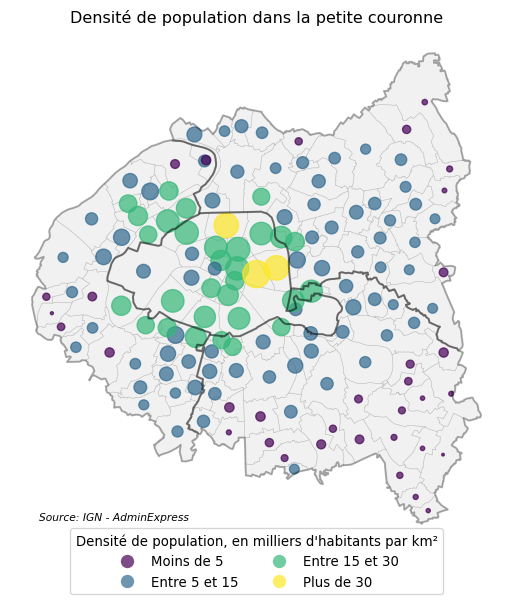

In [33]:
# 8/ 
ax = df.plot(
    color="lightgray", edgecolor="grey",
    figsize=(7,7), 
    linewidth=0.4, alpha = 0.3)
df_points.plot(
    ax=ax,
    column="markercolor", markersize="markersize",
    alpha=0.7, #categorical=False,
    legend = True,
    legend_kwds={'loc': 'upper center', "ncol": 2, "bbox_to_anchor": (0.5, 0.05)},
    cmap='viridis')
departements.boundary.plot(
    ax = ax, edgecolor = "black", alpha = 0.3)
ax.axis("off")
ax.set(title='Densité de population dans la petite couronne')
ax.get_legend().set_title("Densité de population, en milliers d'habitants par km²")
plt.figtext(0.3, 0.15,
            "Source: IGN - AdminExpress",
            wrap=True, horizontalalignment='center',
            fontsize=8, style = "italic")